In [54]:
c_orange_d = '#FF5722'
c_orange = '#FF9800'
c_red = '#D32F2F'
c_green_d = '#388E3C'
c_green = '#4CAF50'
c_blue_d = '#303F9F'
c_blue_l = '#2196F3'
c_teal_d = '#00796B'
c_purple = '#9C27B0'
c_purple_d = '#512DA8'
c_yellow_d = '#FFA000'
c_yellow = '#FFC107'
c_grey = '#607D8B'
c_grey_d = '#455A64'

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import rcParams
from statsmodels.tsa.seasonal import seasonal_decompose
rcParams['agg.path.chunksize'] = 10000

sns.set_style('white')
sns.set_context("poster")

df = pd.read_hdf('elite_sen_3.h5', 'table')
dft = df['trf_count'].loc['2016-09-01':]
dft2 = dft.resample('1800S').sum()
dft3 = dft2.loc['2016-09-01':'2017-01-01']
dft.head()

del [df, dft, dft2]

In [55]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import acf, pacf

In [56]:
dft3 = dft3.loc['2016-10-01':'2016-12-01']

## FIRST ORDER

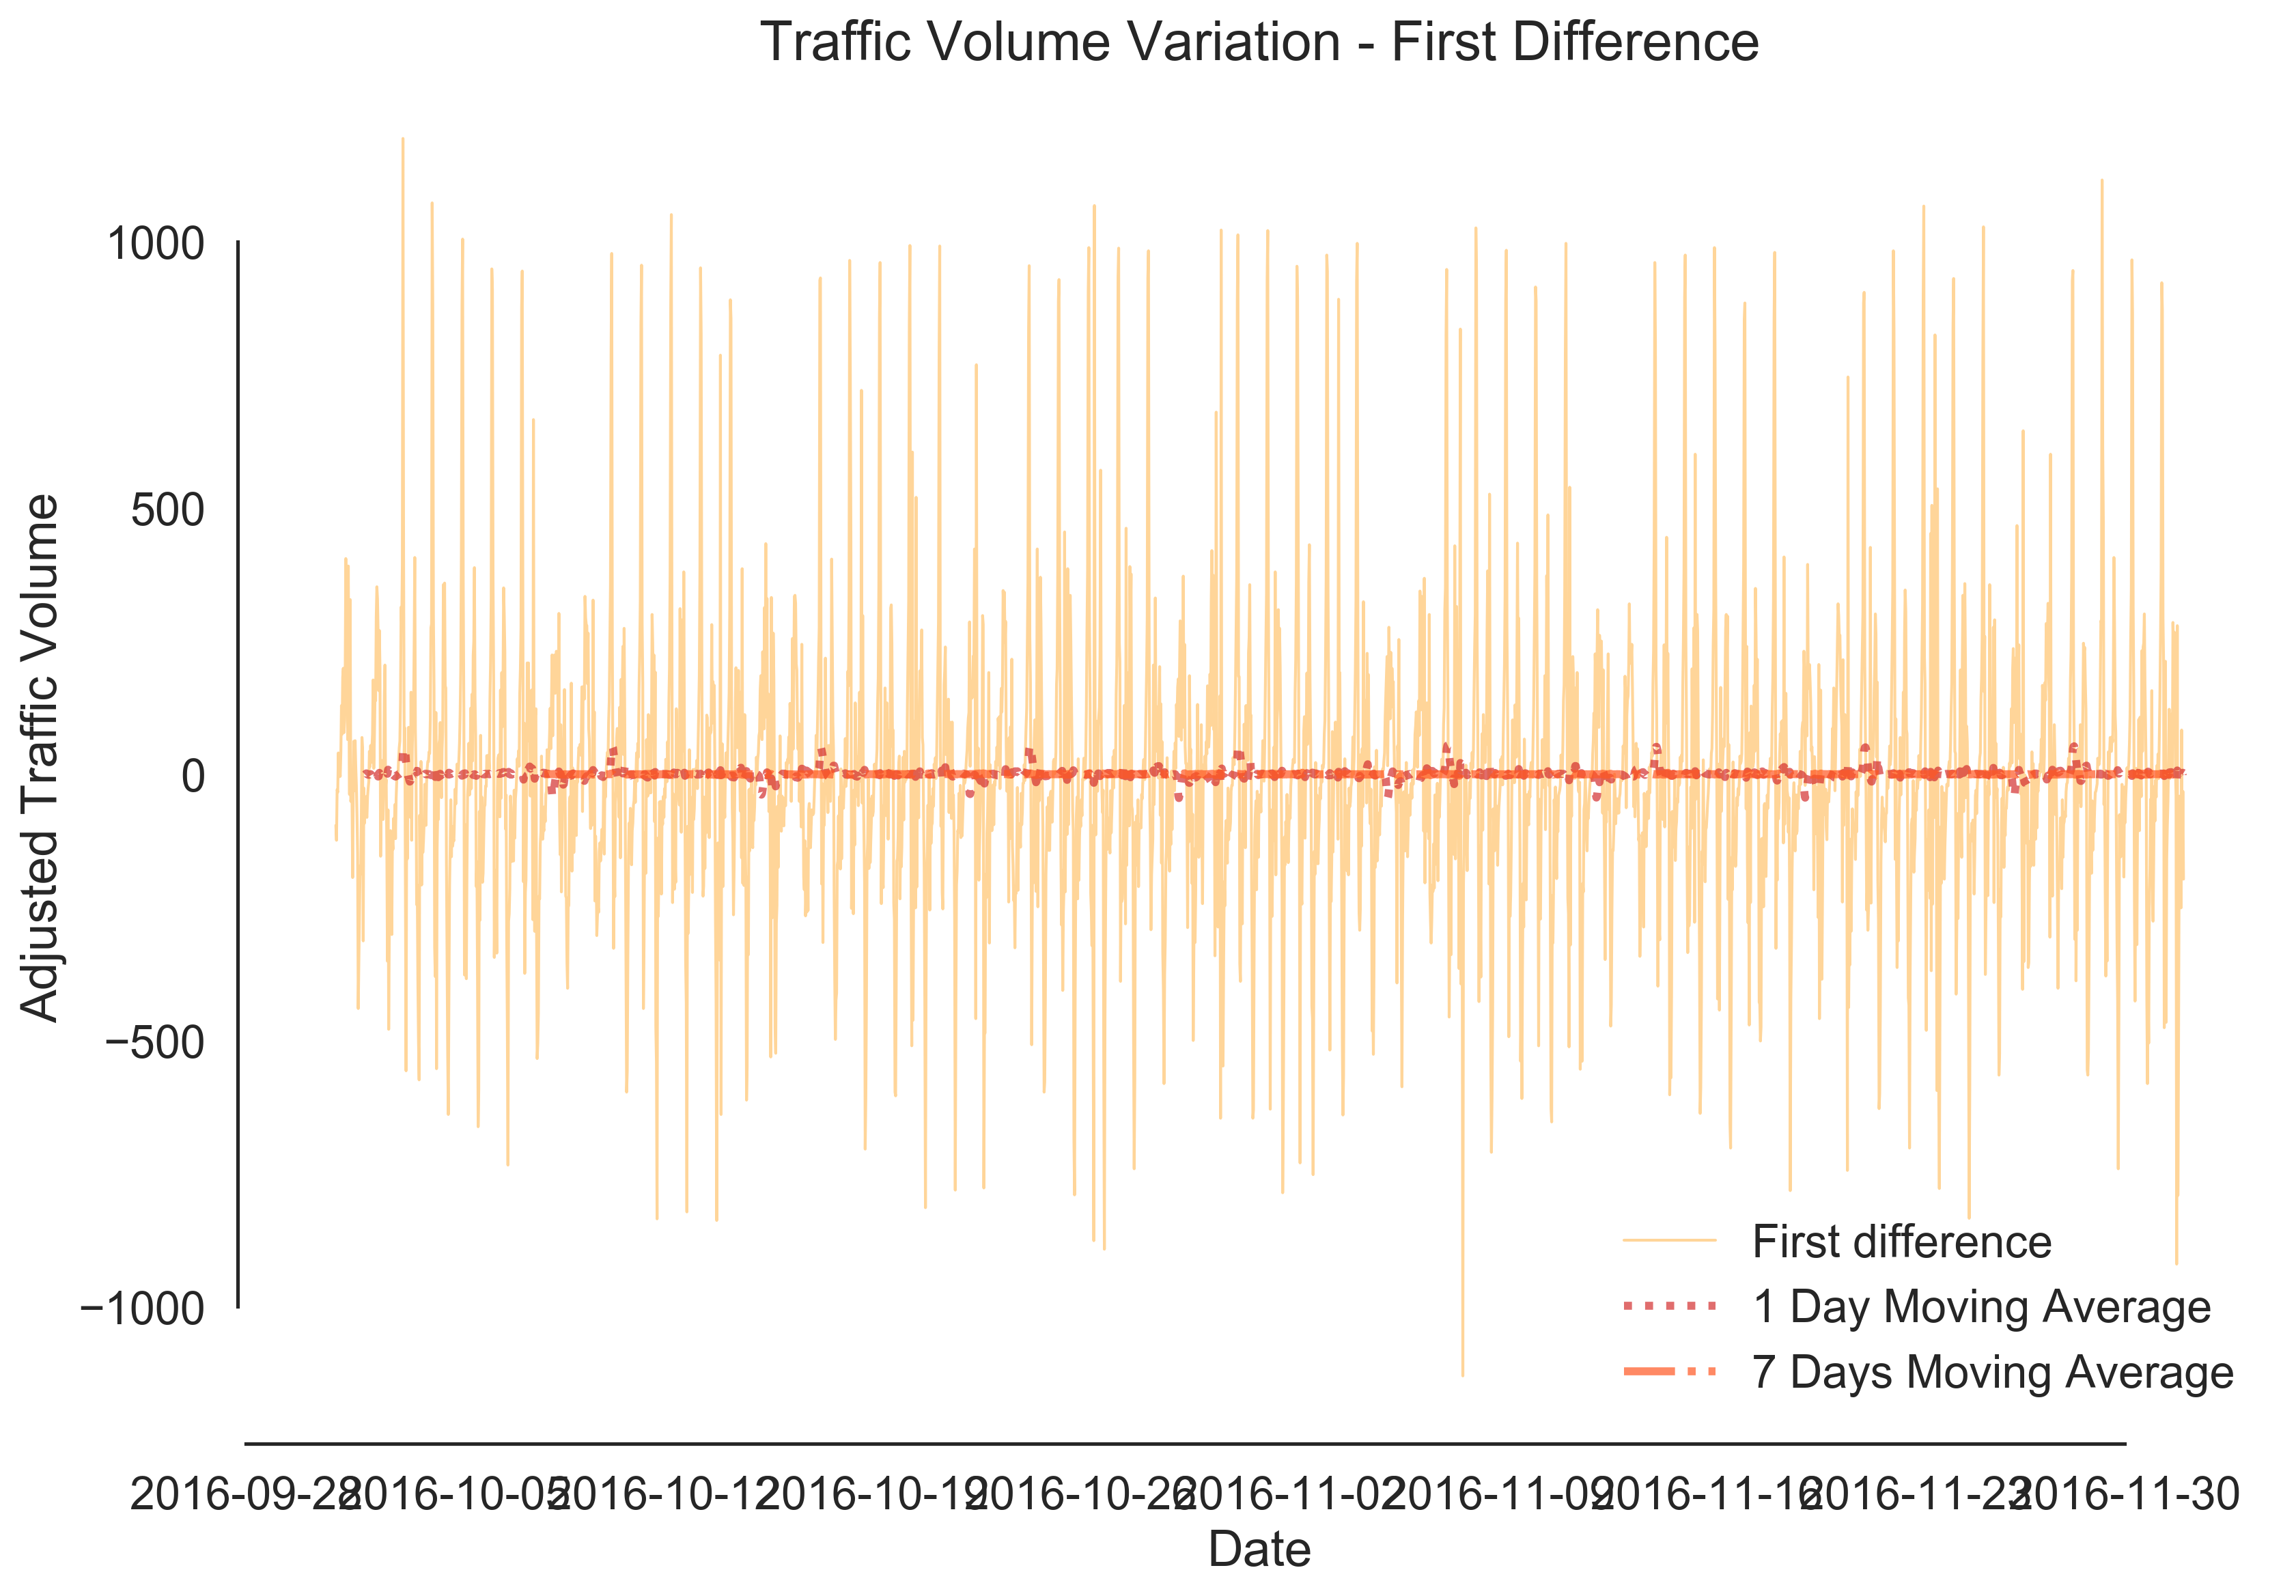

In [38]:
s = dft3.diff(1)
rolmean1 = s.rolling(48).mean()
rolmean7 = s.rolling(336).mean()
sns.set_style('white')

plt.figure(dpi=300)
plt.title('Traffic Volume Variation - First Difference')
plt.plot(s, linewidth=1, color=c_orange, alpha=0.4, label='First difference')
plt.plot(rolmean1, label='1 Day Moving Average', color=c_red, linestyle=':', alpha=0.7)
plt.plot(rolmean7, label='7 Days Moving Average', color=c_orange_d, linestyle='-.', alpha=0.7)
plt.ylabel('Adjusted Traffic Volume')
plt.xlabel('Date')
plt.legend(loc=4)
sns.despine(offset=2, trim=True)
# plt.savefig('trf-var-firstdiff.png')

In [39]:
rolmean_o_7 = dft3.rolling(336).mean()

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1, 1))
o_rolmean7 = scaler.fit_transform(rolmean_o_7.dropna())
n_rolmean7 = scaler.fit_transform(rolmean7.dropna())

C:\Users\brian1123\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Users\brian1123\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Users\brian1123\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has 

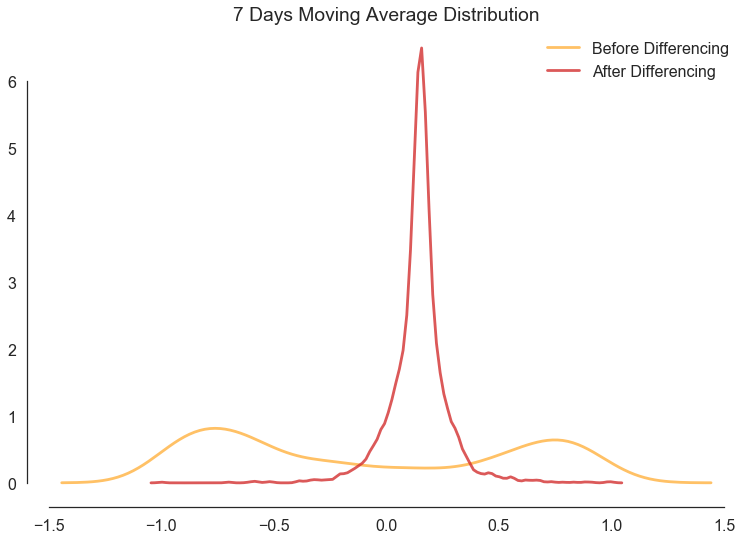

In [40]:
plt.title('7 Days Moving Average Distribution')
sns.kdeplot(o_rolmean7, label='Before Differencing', color=c_orange, alpha=0.6)
sns.kdeplot(n_rolmean7, label='After Differencing', color=c_red, alpha=0.8)
sns.despine(offset=2, trim=True)
# plt.savefig('trf-var-mean-dist.png')

## Diff = 336

In [57]:
dff = pd.DataFrame(dft3.values, columns=['o'])
dff['s1'] = dff['o'].shift(336)
dff['diff1'] = dff['o'] - dff['s1']
dff['rev1'] = dff['diff1'] + dff['s1']

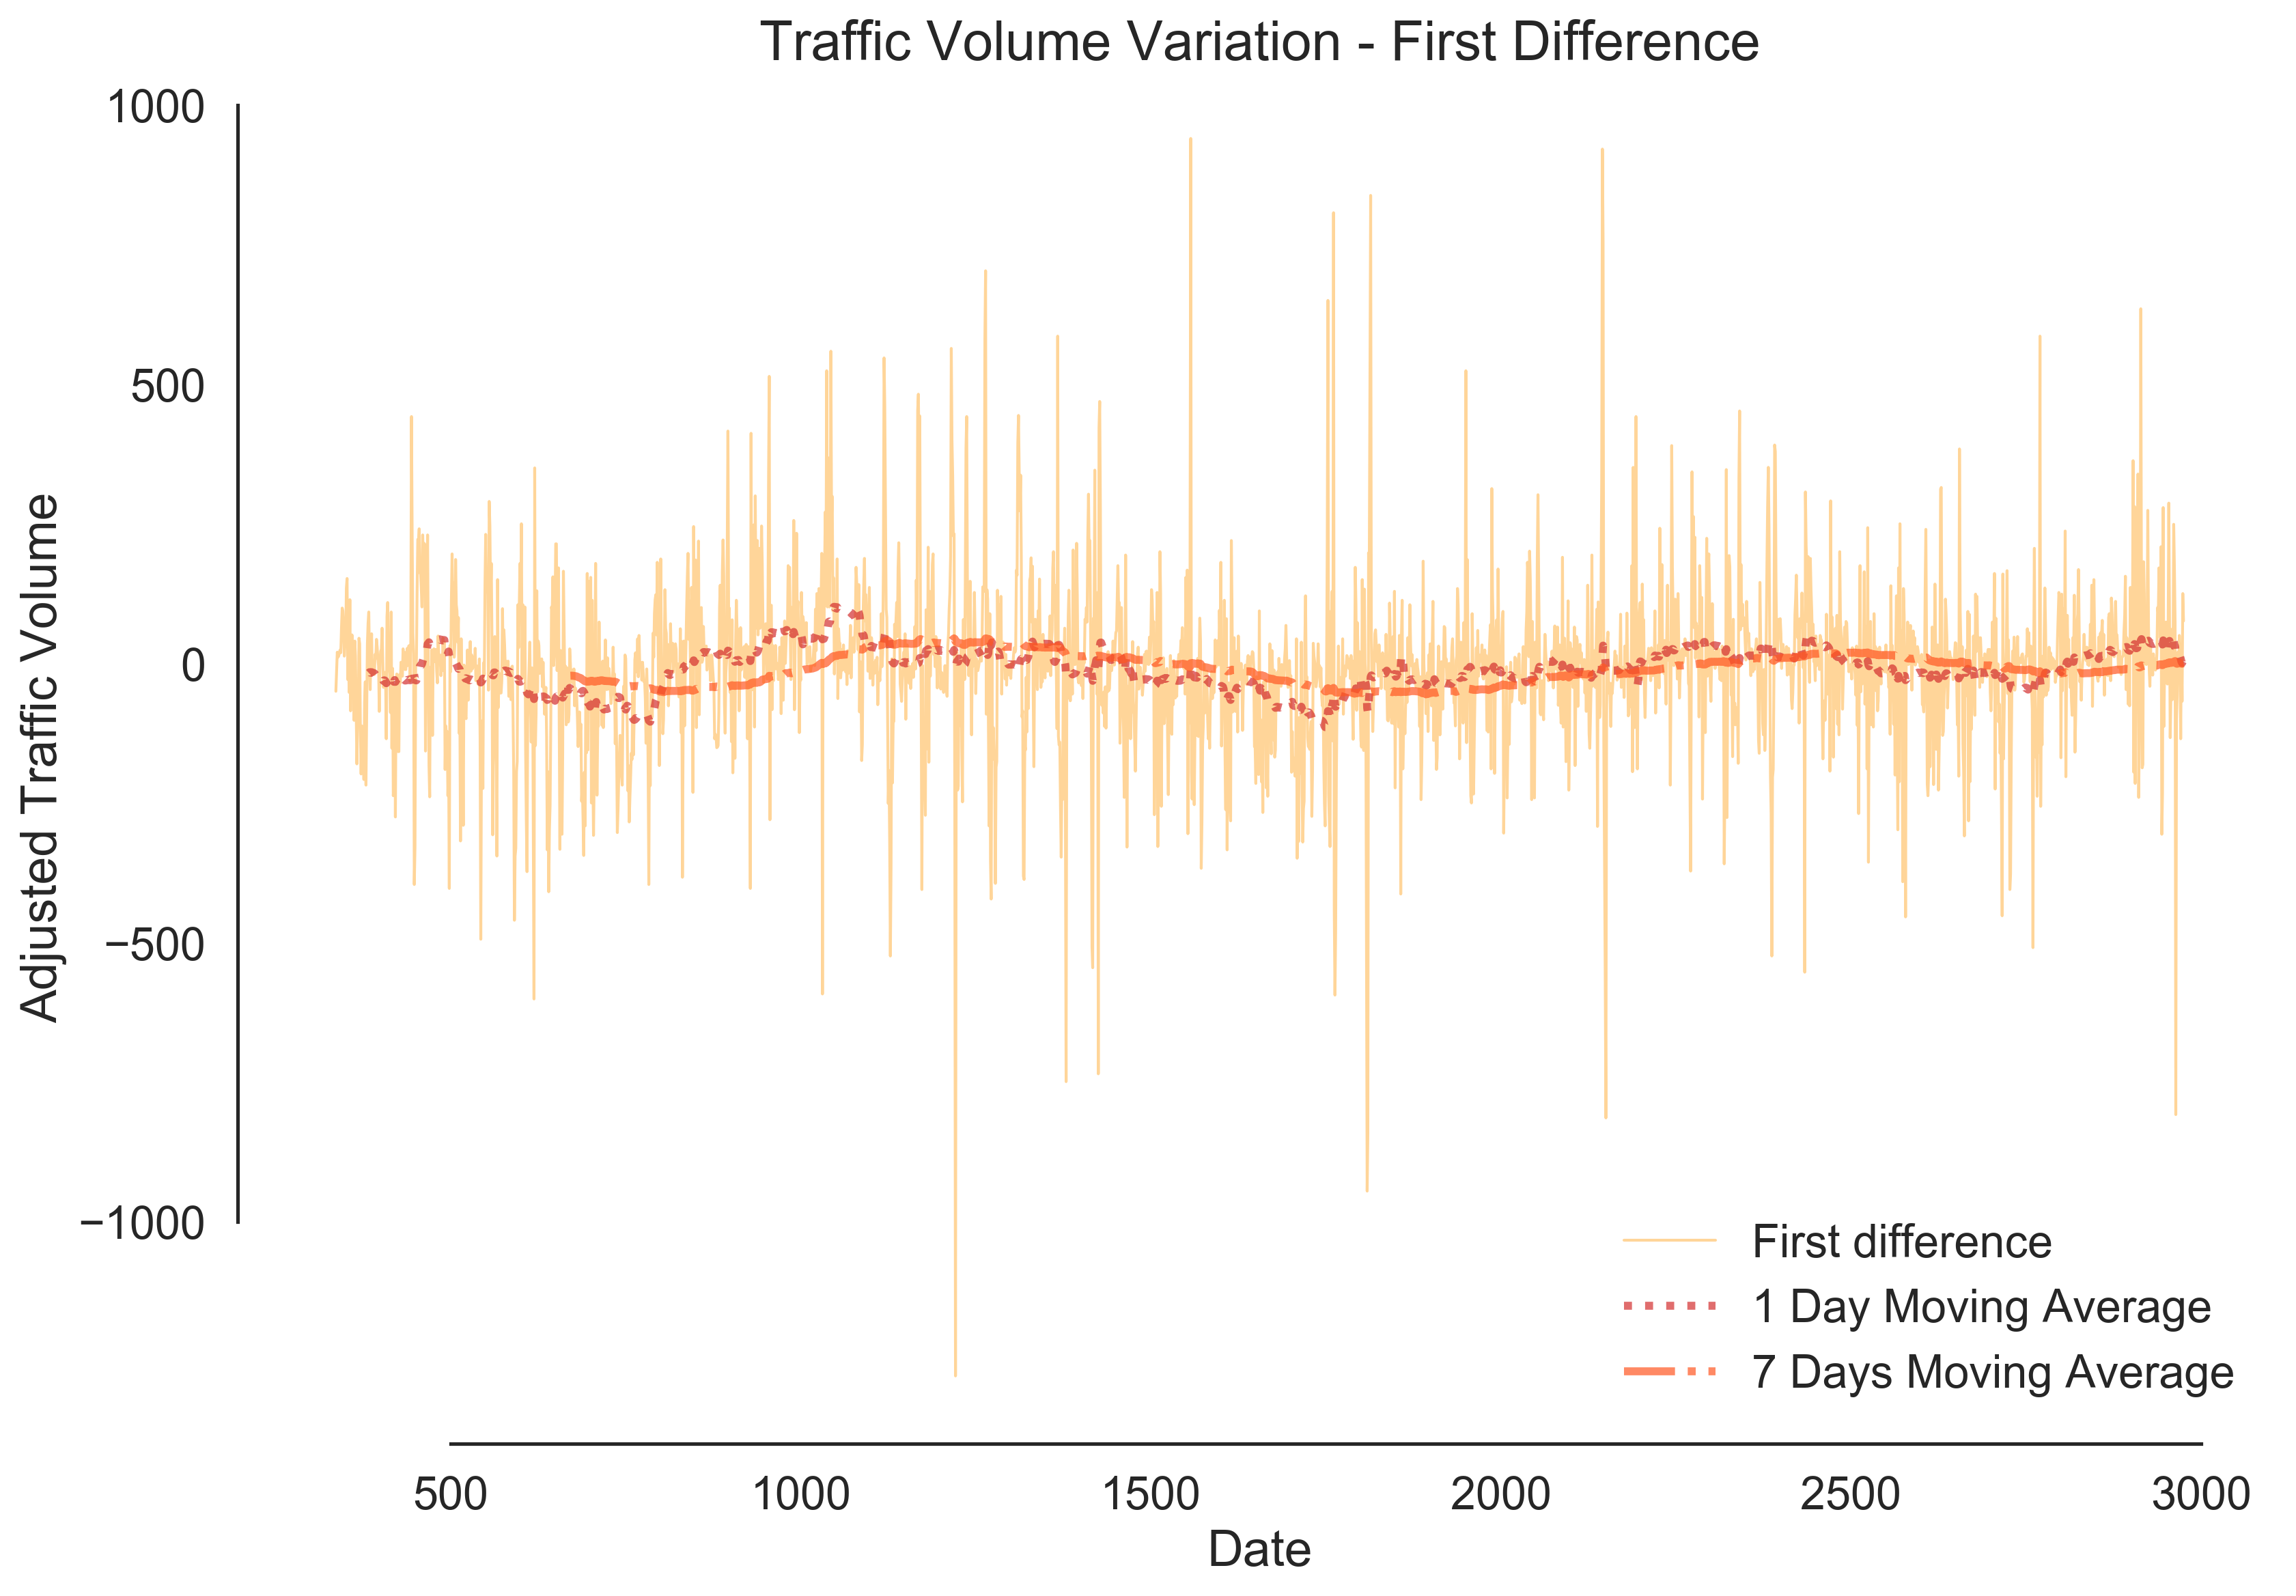

In [6]:
s = dff['diff1']
rolmean1 = s.rolling(48).mean()
rolmean7 = s.rolling(336).mean()

sns.set_style('white')

plt.figure(dpi=300)
plt.title('Traffic Volume Variation - First Difference')
plt.plot(s, linewidth=1, color=c_orange, alpha=0.4, label='First difference')
plt.plot(rolmean1, label='1 Day Moving Average', color=c_red, linestyle=':', alpha=0.7)
plt.plot(rolmean7, label='7 Days Moving Average', color=c_orange_d, linestyle='-.', alpha=0.7)
plt.ylabel('Adjusted Traffic Volume')
plt.xlabel('Date')
plt.legend(loc=4)
sns.despine(offset=2, trim=True)
# plt.savefig('trf-var-diff336.png')

In [59]:
nn_rolmean7 = scaler.fit_transform(rolmean7.dropna())

C:\Users\brian1123\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Users\brian1123\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


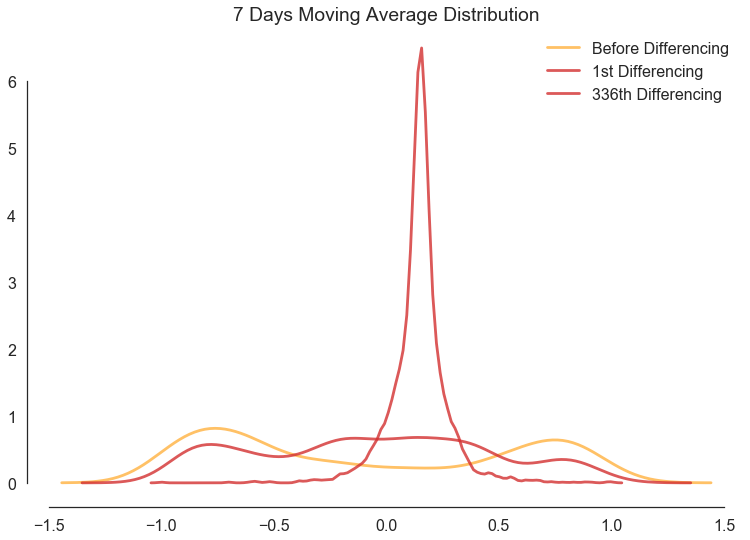

In [60]:
plt.title('7 Days Moving Average Distribution')
sns.kdeplot(o_rolmean7, label='Before Differencing', color=c_orange, alpha=0.6)
sns.kdeplot(n_rolmean7, label='1st Differencing', color=c_red, alpha=0.8)
sns.kdeplot(nn_rolmean7, label='336th Differencing', color=c_red, alpha=0.8)
sns.despine(offset=2, trim=True)
# plt.savefig('trf-var-mean-dist.png')

## ACF

In [58]:
X = dff['diff1'].dropna().values
lags = 300 # 1 day
lag_acf = acf(X, nlags=lags)
lag_pacf = pacf(X, nlags=lags, method='ols')

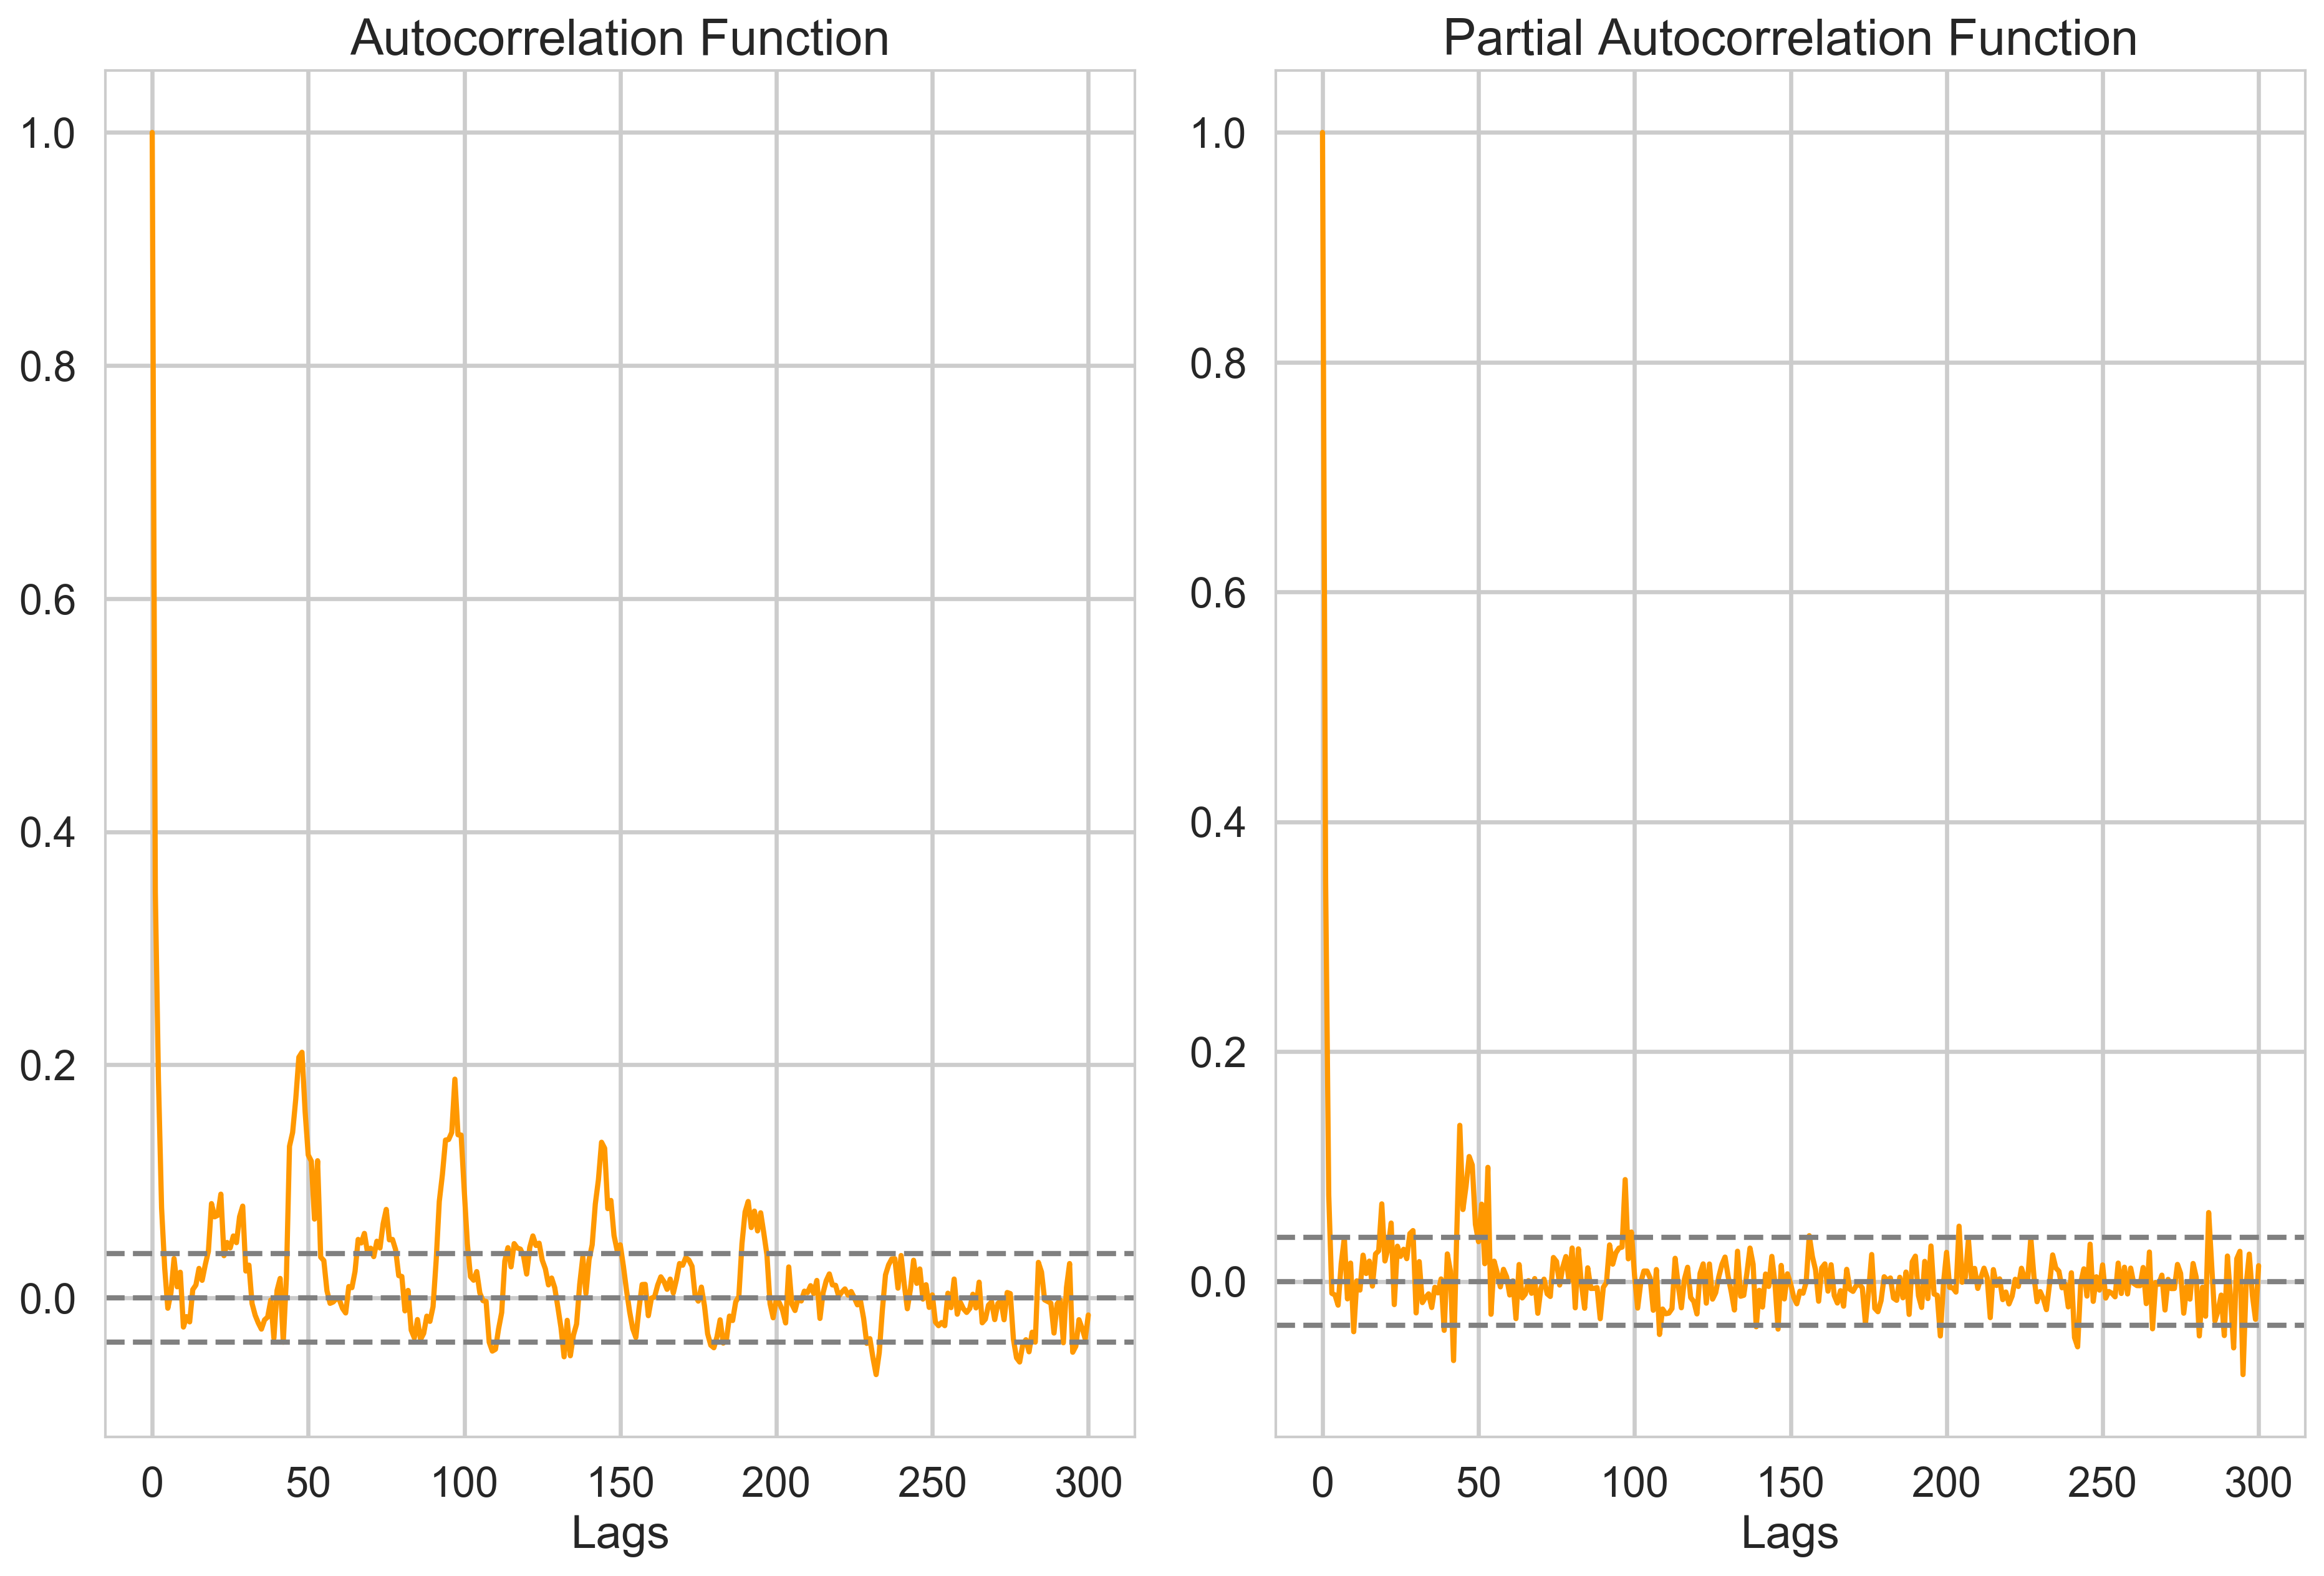

In [66]:
sns.set_style('whitegrid')

#Plot ACF: 
plt.figure(dpi=300)
plt.subplot(121) 
plt.plot(lag_acf, linewidth=2, color=c_orange)
plt.axhline(y=0,linestyle='--',color='gray', linewidth=2)
plt.axhline(y=-1.96/np.sqrt(len(X)),linestyle='--',color='gray', linewidth=2)
plt.axhline(y=1.96/np.sqrt(len(X)),linestyle='--',color='gray', linewidth=2)
plt.xlabel('Lags')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf, linewidth=2, color=c_orange)
plt.axhline(y=0,linestyle='--',color='gray', linewidth=2)
plt.axhline(y=-1.96/np.sqrt(len(X)),linestyle='--',color='gray', linewidth=2)
plt.axhline(y=1.96/np.sqrt(len(X)),linestyle='--',color='gray', linewidth=2)
plt.xlabel('Lags')
plt.title('Partial Autocorrelation Function')

plt.tight_layout()
plt.savefig('ACF-PACF-LAG-336.png')

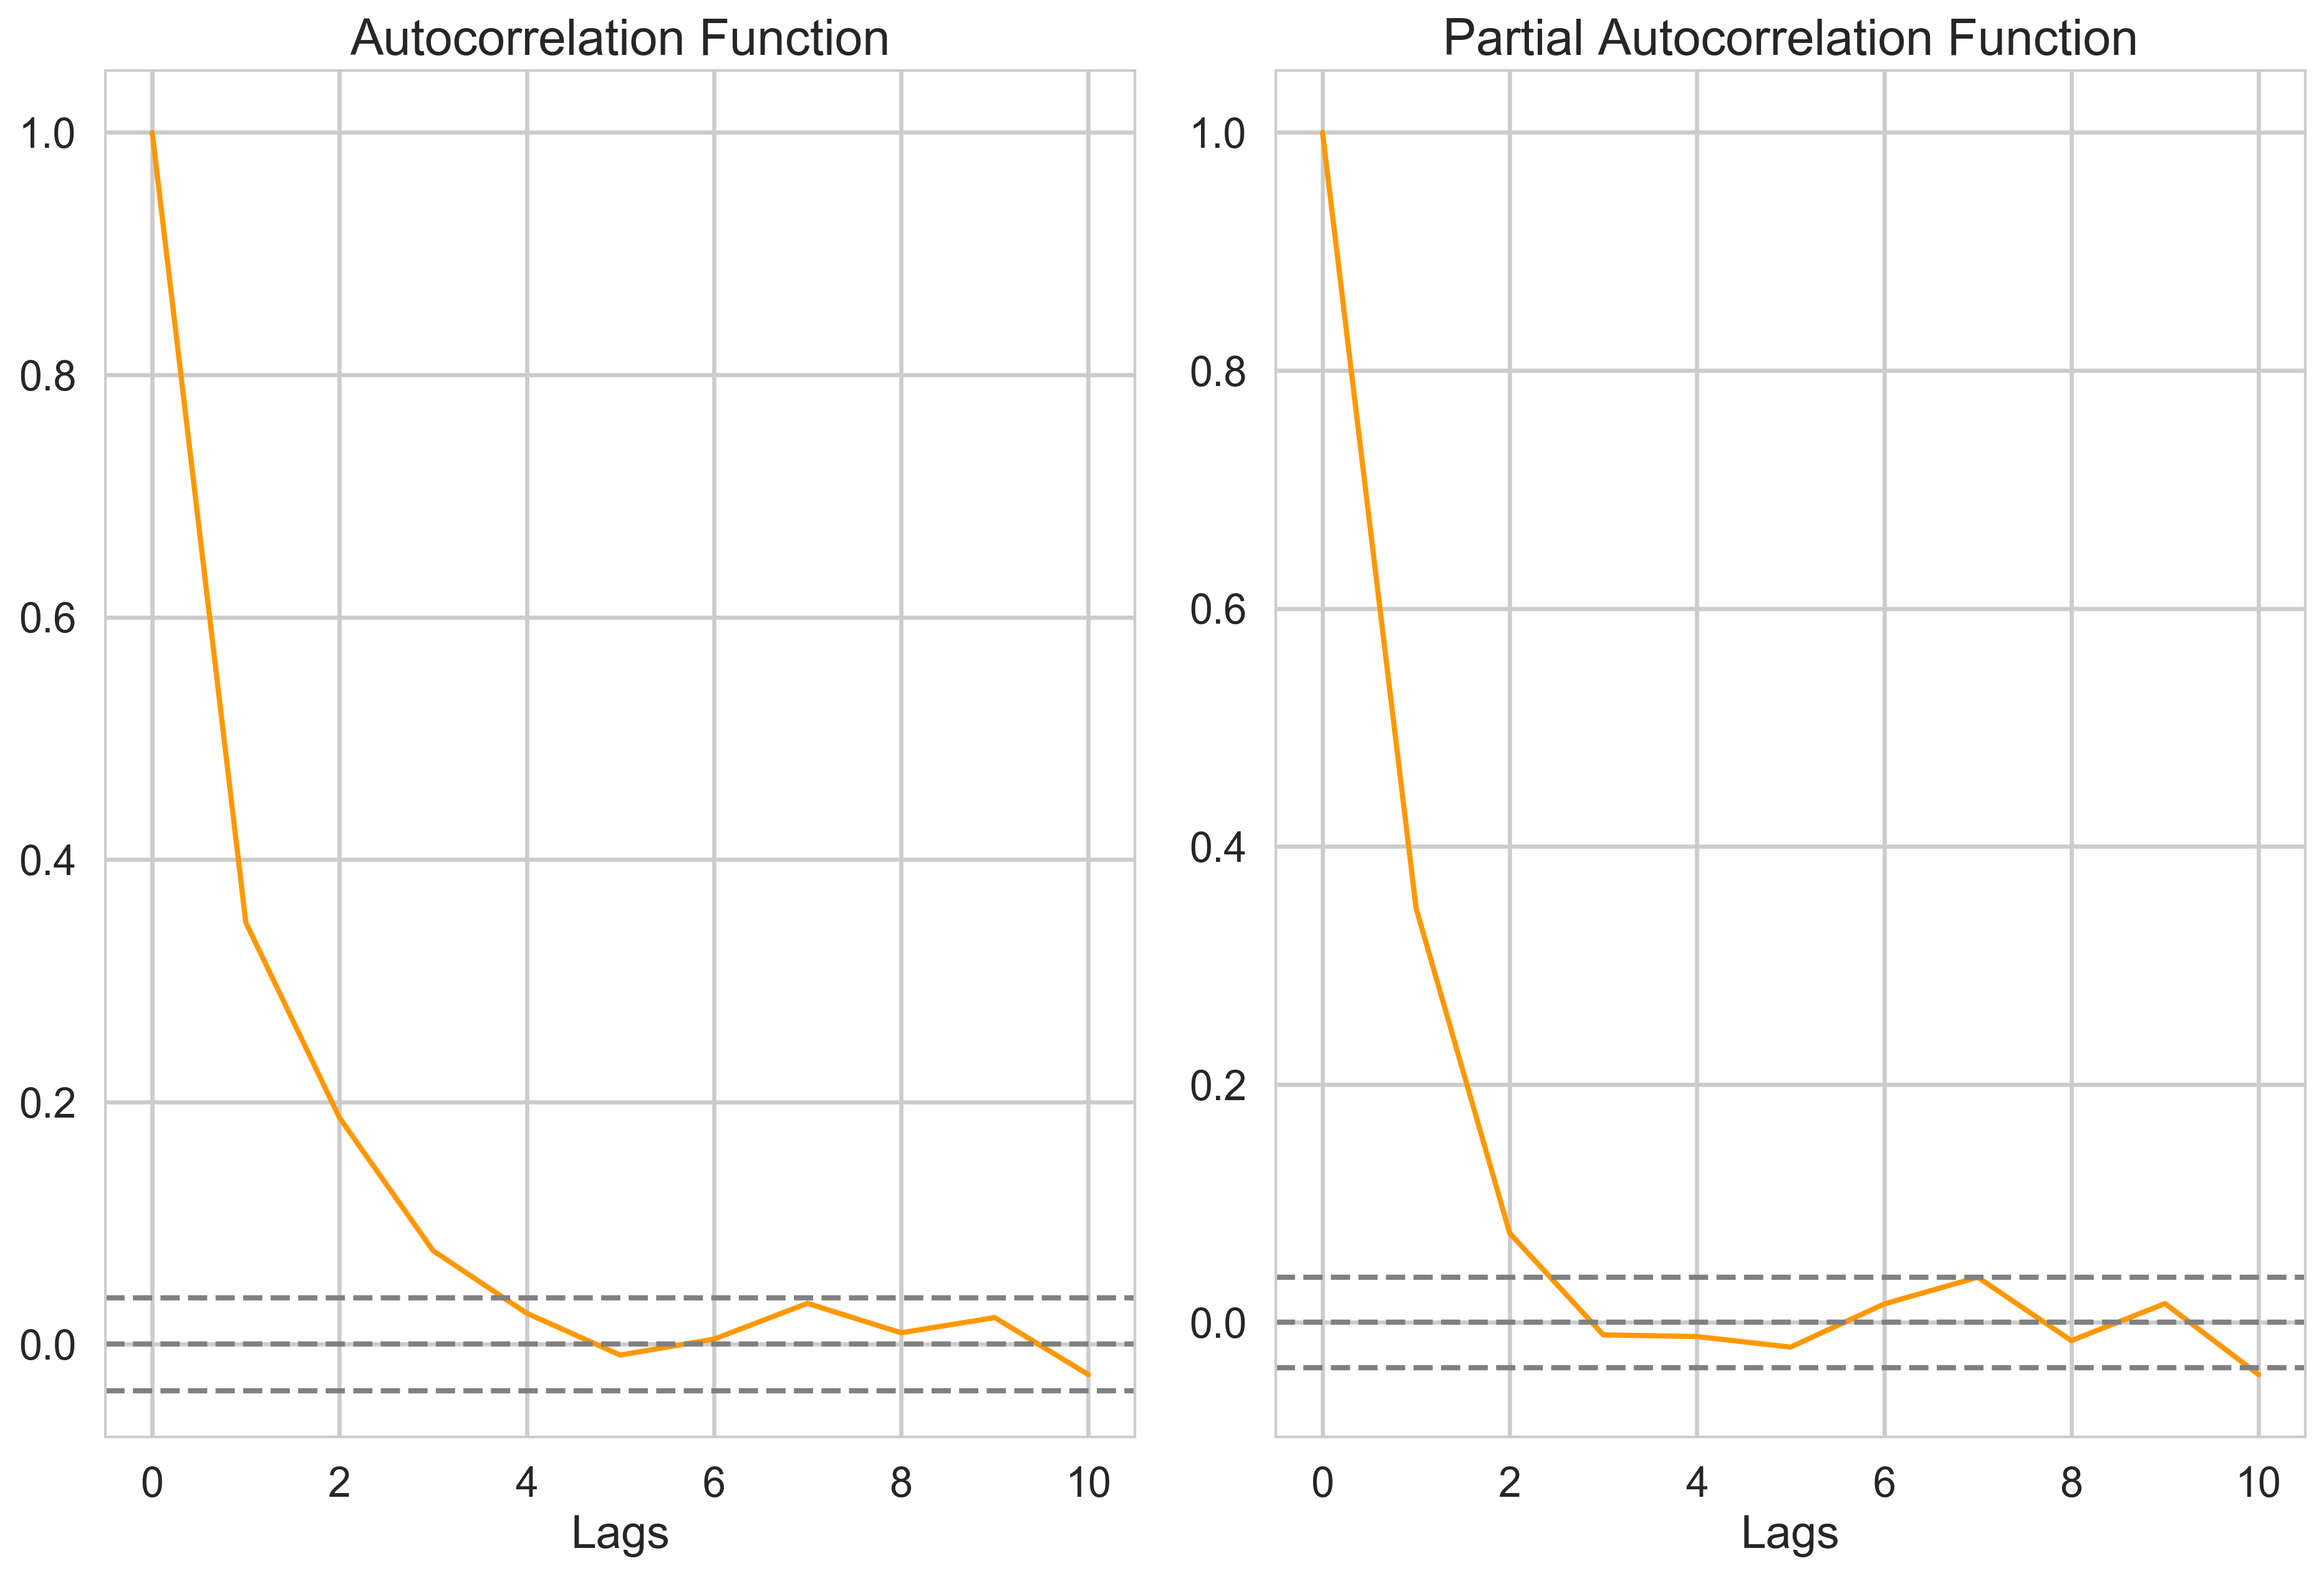

In [43]:
X = dff['diff1'].dropna().values
lags = 10 # 1 day
lag_acf = acf(X, nlags=lags)
lag_pacf = pacf(X, nlags=lags, method='ols')
sns.set_style('whitegrid')

#Plot ACF: 
plt.figure(dpi=300)
plt.subplot(121) 
plt.plot(lag_acf, linewidth=2, color=c_orange)
plt.axhline(y=0,linestyle='--',color='gray', linewidth=2)
plt.axhline(y=-1.96/np.sqrt(len(X)),linestyle='--',color='gray', linewidth=2)
plt.axhline(y=1.96/np.sqrt(len(X)),linestyle='--',color='gray', linewidth=2)
plt.xlabel('Lags')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf, linewidth=2, color=c_orange)
plt.axhline(y=0,linestyle='--',color='gray', linewidth=2)
plt.axhline(y=-1.96/np.sqrt(len(X)),linestyle='--',color='gray', linewidth=2)
plt.axhline(y=1.96/np.sqrt(len(X)),linestyle='--',color='gray', linewidth=2)
plt.xlabel('Lags')
plt.title('Partial Autocorrelation Function')

plt.tight_layout()
# plt.savefig('ACF-PACF-336.png')

p = 2, d = 1, q = 4

## ARIMA

In [60]:
model = ARIMA(X, order=(2, 1, 4)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                 2639
Model:                 ARIMA(2, 1, 4)   Log Likelihood              -16681.324
Method:                       css-mle   S.D. of innovations            134.492
Date:                Sun, 22 Apr 2018   AIC                          33378.647
Time:                        13:07:37   BIC                          33425.673
Sample:                             1   HQIC                         33395.673
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0101      0.048      0.211      0.833      -0.083       0.103
ar.L1.D.y     -0.7015      0.100     -6.995      0.000      -0.898      -0.505
ar.L2.D.y      0.2882      0.100      2.888      0.004       0.093       0.484
ma.L1.D.y      0.0183      0.100      0.182      0.855      -0.179       0.215
ma.L2.D.y     -0.9116      0.035    -25.792      0.000      -0.981      -0.842
ma.L3.D.y     -0.0087      0.098     -0.088      0.930      -0.201       0.184
ma.L4.D.y     -0.0731      0.034     -2.179      0.029      -0.139      -0.007
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.0081           +0.0000j            1.0081            0.5000
AR.2            3.4417           +0.0000j            3.4417            0.0000
MA.1           -1.0027           -0.0000j            1.0027           -0.5000
MA.2            1.0116           -0.0000j            1.0116           -0.0000
MA.3           -0.0640           -3.6710j            3.6715           -0.2528
MA.4           -0.0640           +3.6710j            3.6715            0.2528
-----------------------------------------------------------------------------
"""

In [61]:
## Combined Model
o_val = X[:-1]
n_val = -model.fittedvalues
corr = np.corrcoef(n_val, o_val)[0][1]
corr

0.97397578711369959

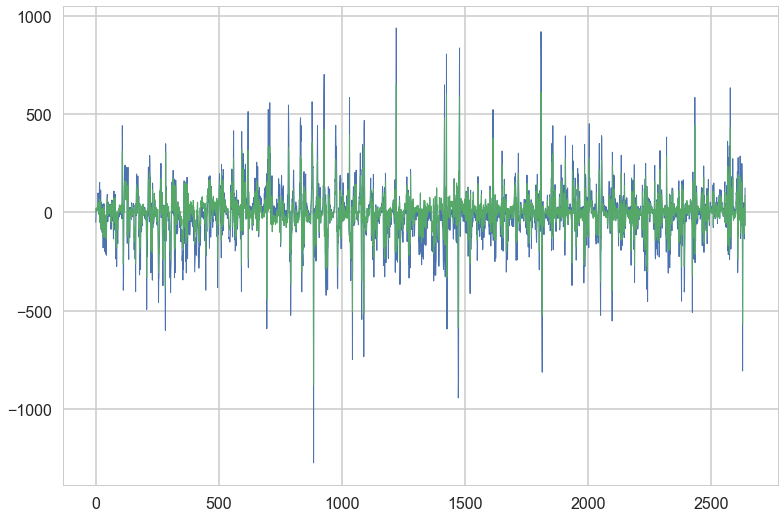

In [46]:
plt.figure()
plt.plot(o_val, linewidth=1)
plt.plot(n_val, linewidth=1)
# plt.title('MSE: {:.4f}'.format(sum((model.fittedvalues-X)**2)/len(X)))
# plt.title('PCC: {:.4f}'.format(corr))

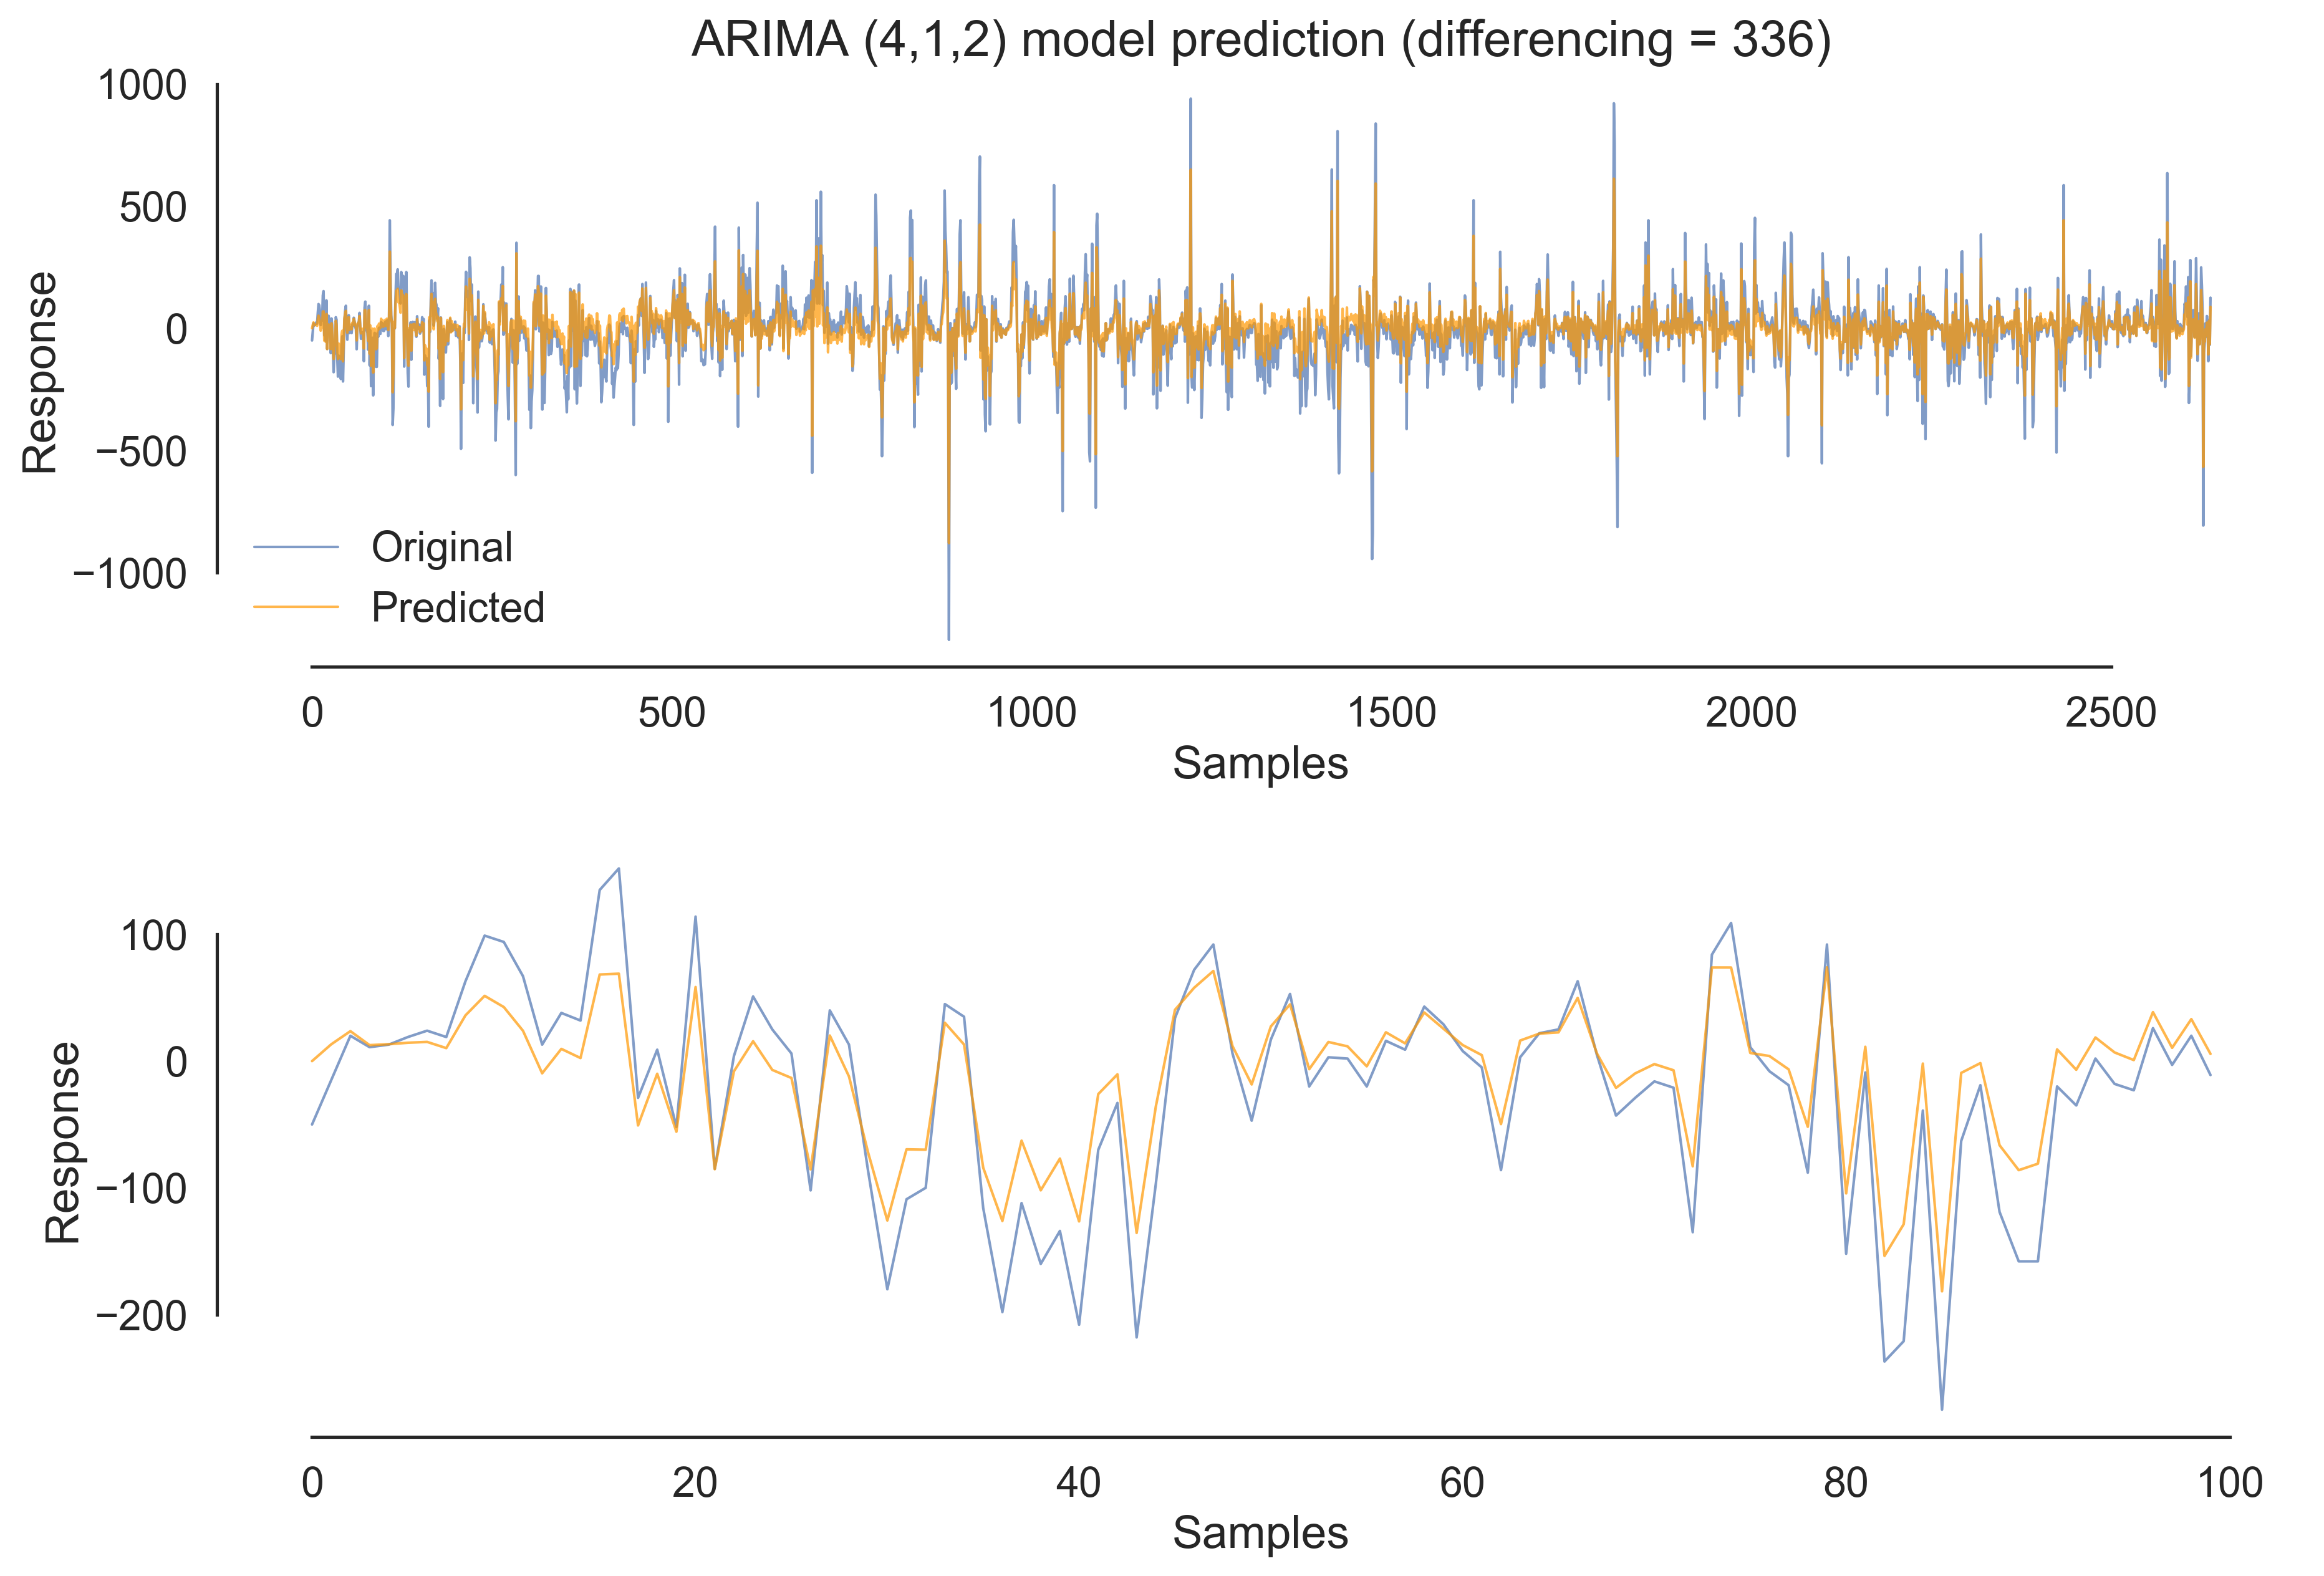

In [97]:
sns.set_style('white')
plt.figure(dpi=300)
plt.subplot(211)

plt.plot(o_val, linewidth=1, alpha=0.7, label='Original')
plt.plot(n_val, linewidth=1, alpha=0.7, label='Predicted', color=c_orange)

plt.title('ARIMA (4,1,2) model prediction (differencing = 336)')
plt.xlabel('Samples')
plt.ylabel('Response')
plt.legend()
sns.despine(offset=0, trim=True)
plt.tight_layout()

plt.subplot(212)
plt.plot(o_val[0:100], linewidth=1, alpha=0.7, label='Original')
plt.plot(n_val[0:100], linewidth=1, alpha=0.7, label='Predicted', color=c_orange)

plt.xlabel('Samples')
plt.ylabel('Response')
# plt.legend()
sns.despine(offset=0, trim=True)
plt.tight_layout()

# plt.savefig('arima-predictio-diff.png')

In [62]:
z = np.zeros(337)
y_arima = np.append(z, n_val)
dff['arima'] = y_arima
dff['rev_arima'] = dff['arima'] + dff['s1']

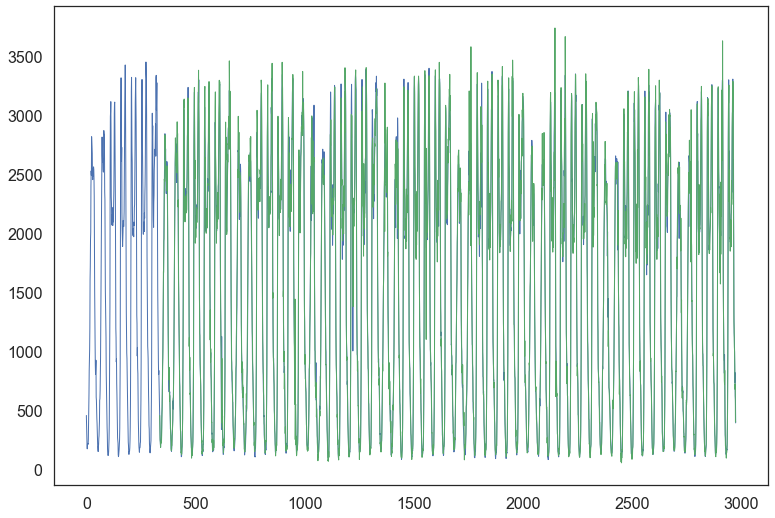

In [63]:
plt.plot(dff['o'], linewidth=1)
plt.plot(dff['rev_arima'], linewidth=1)

In [50]:
from sklearn.metrics import r2_score, mean_absolute_error, median_absolute_error

In [64]:
y_test = dff['o'].values[337:]
y_pred = dff['rev_arima'].values[337:]

In [65]:
r2_score(y_test, y_pred)

0.98059873153167199

In [123]:
mean_ae = mean_absolute_error(y_test, y_pred)
mean_ae

92.788590782818744

In [125]:
median_ae = median_absolute_error(y_test, y_pred)
median_ae

56.243963964544946

In [84]:
a = dff.copy()

In [86]:
a = a.dropna()

In [87]:
a.head()

o     s1  diff1   rev1      arima   rev_arima
336  403.0  453.0  -50.0  403.0   0.000000  453.000000
337  342.0  357.0  -15.0  342.0  -0.010063  356.989937
338  253.0  233.0   20.0  253.0  13.237039  246.237039
339  215.0  204.0   11.0  215.0  23.623188  227.623188
340  183.0  170.0   13.0  183.0  12.600650  182.600650

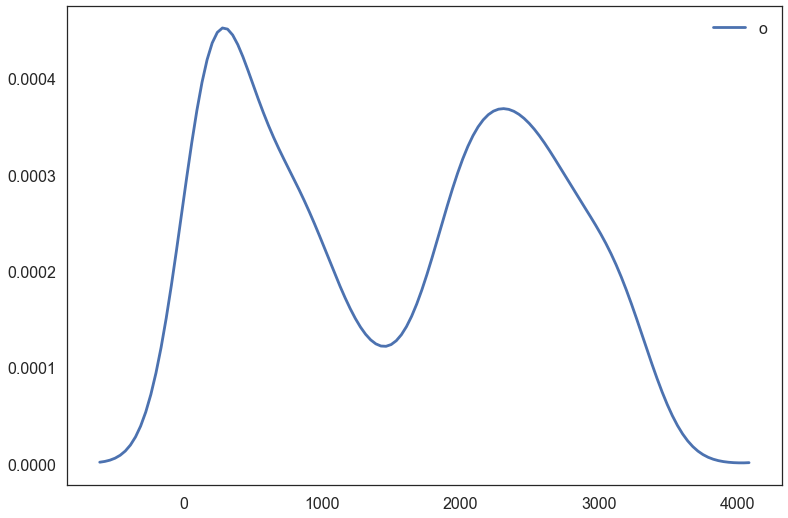

In [91]:
sns.kdeplot(a.o)

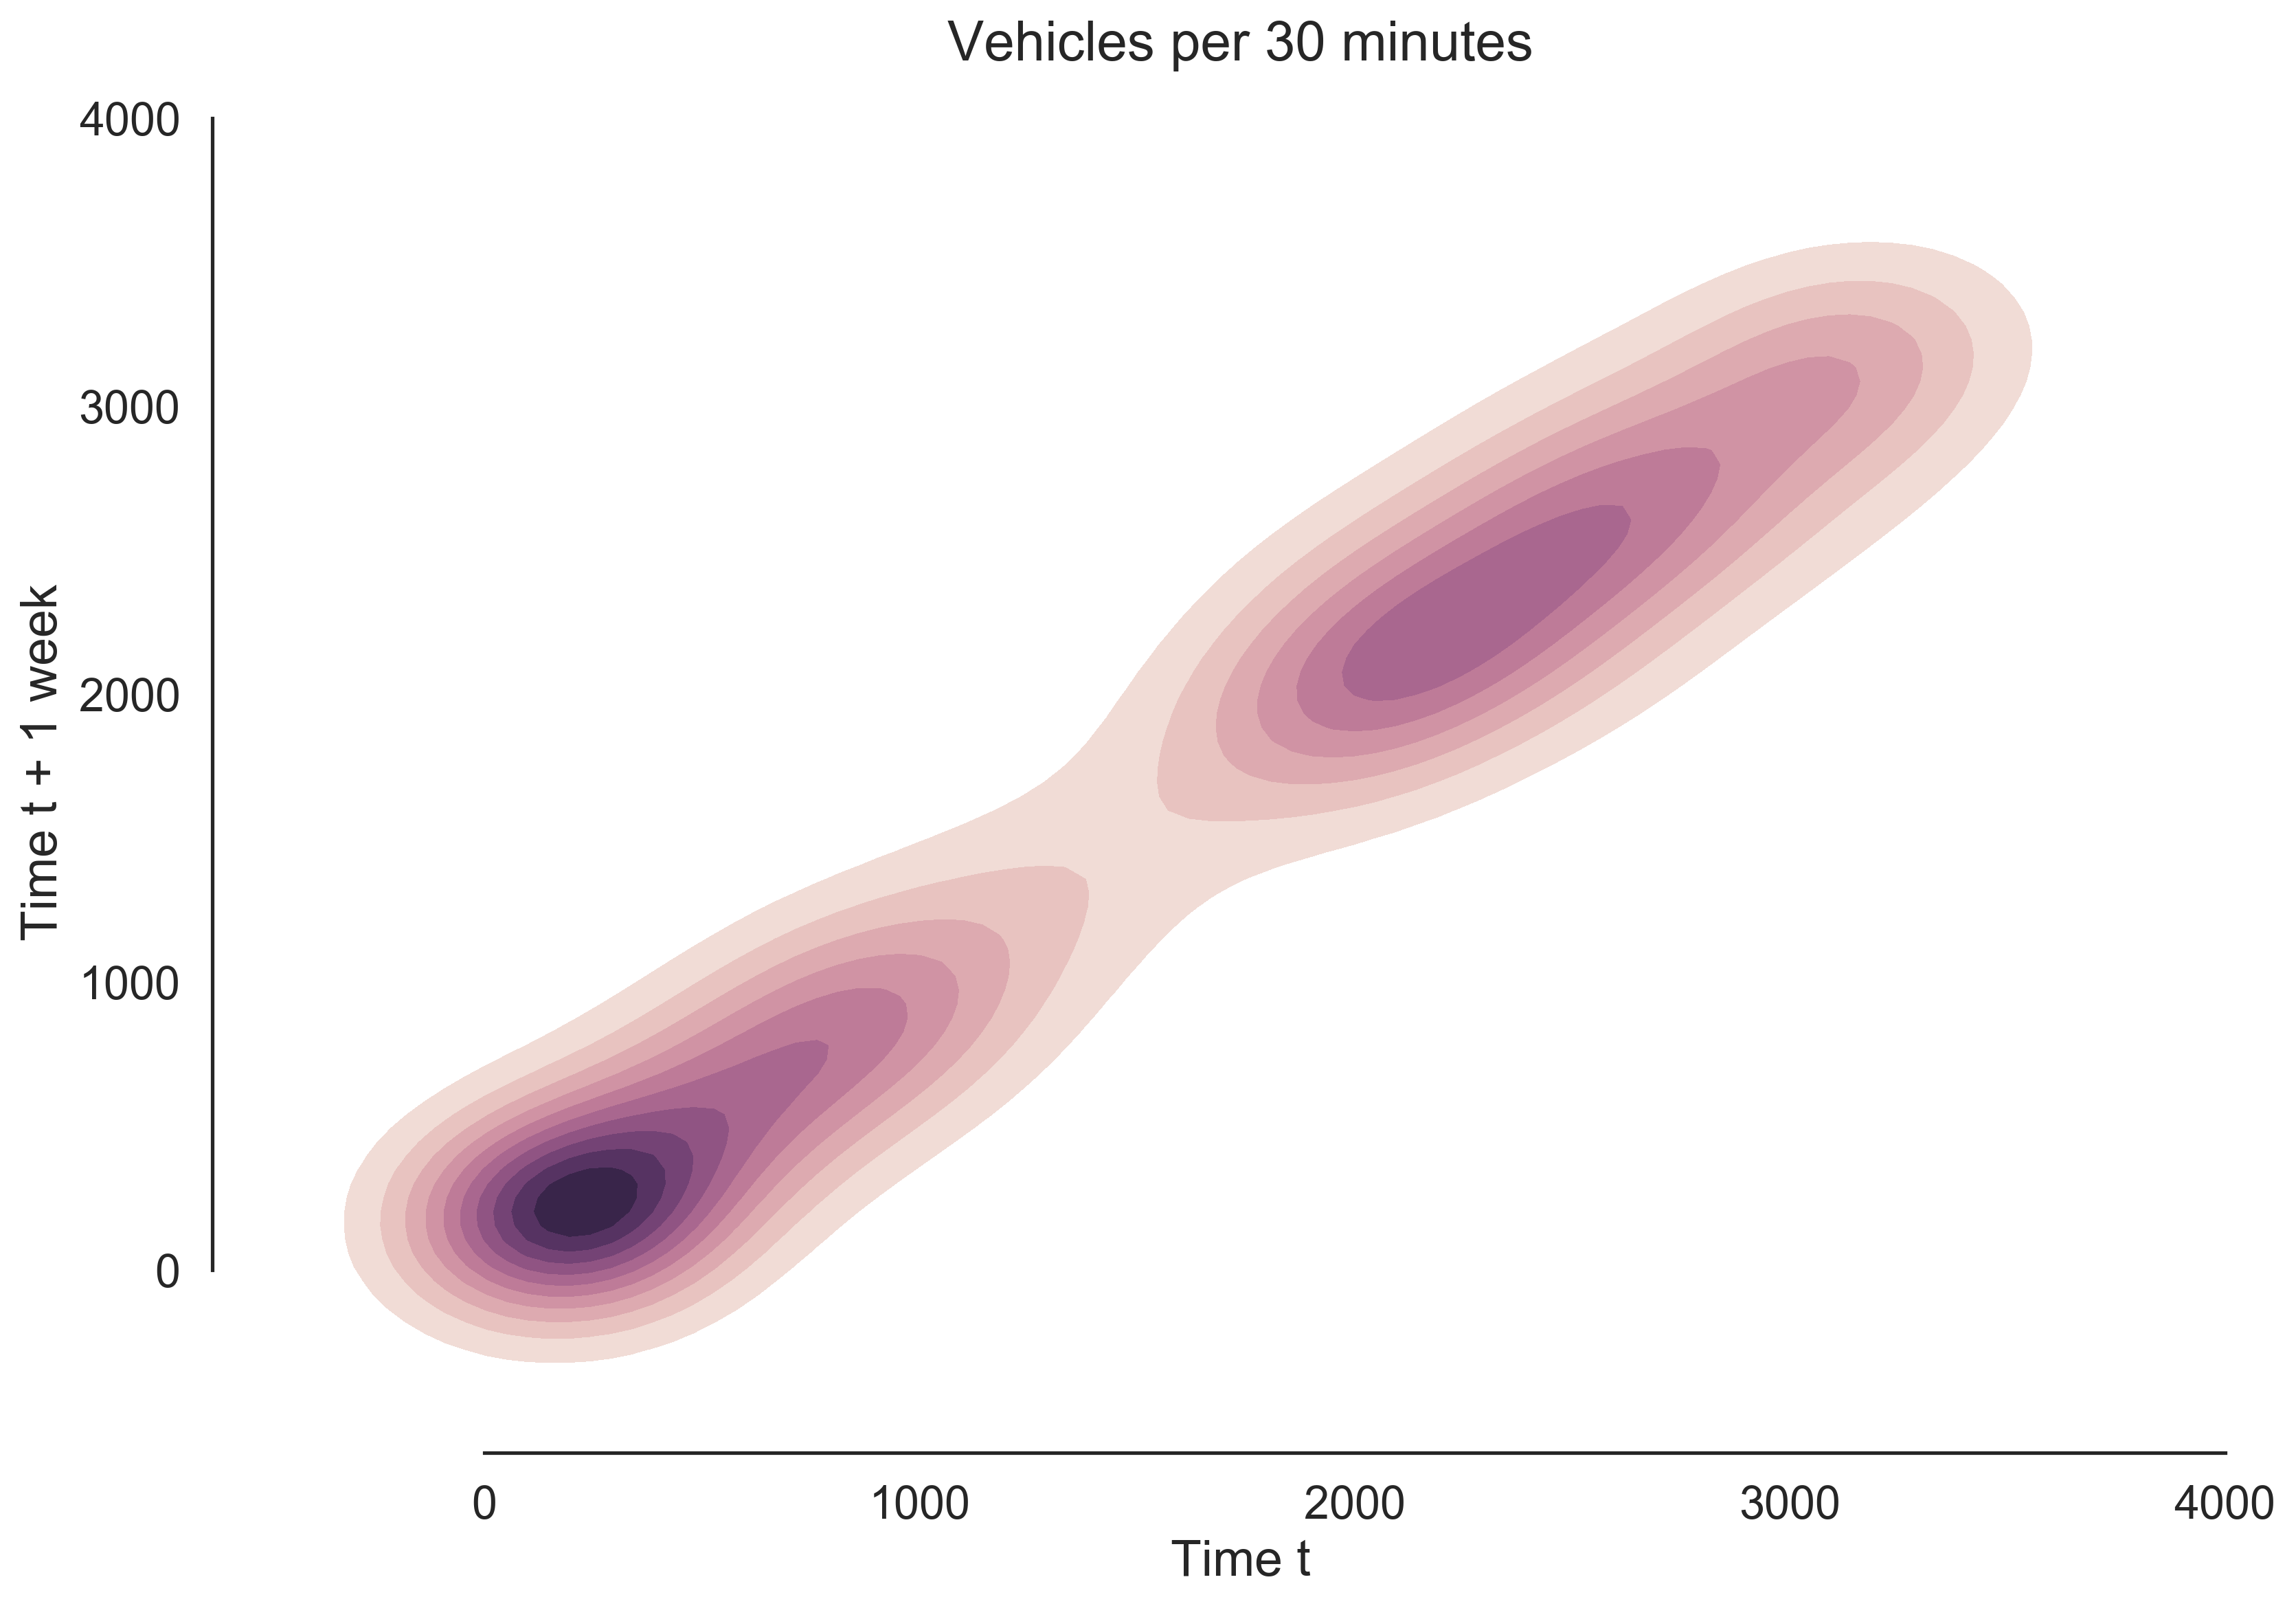

In [118]:
plt.figure(dpi=300)
plt.title('Vehicles per 30 minutes')
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
sns.kdeplot(a.o, a.s1, shade=True, cbar=True, cmap=cmap, shade_lowest=False)
plt.ylabel('Time t + 1 week')
plt.xlabel('Time t')
sns.despine(offset=2, trim=True)
plt.savefig('trf-kde.png')

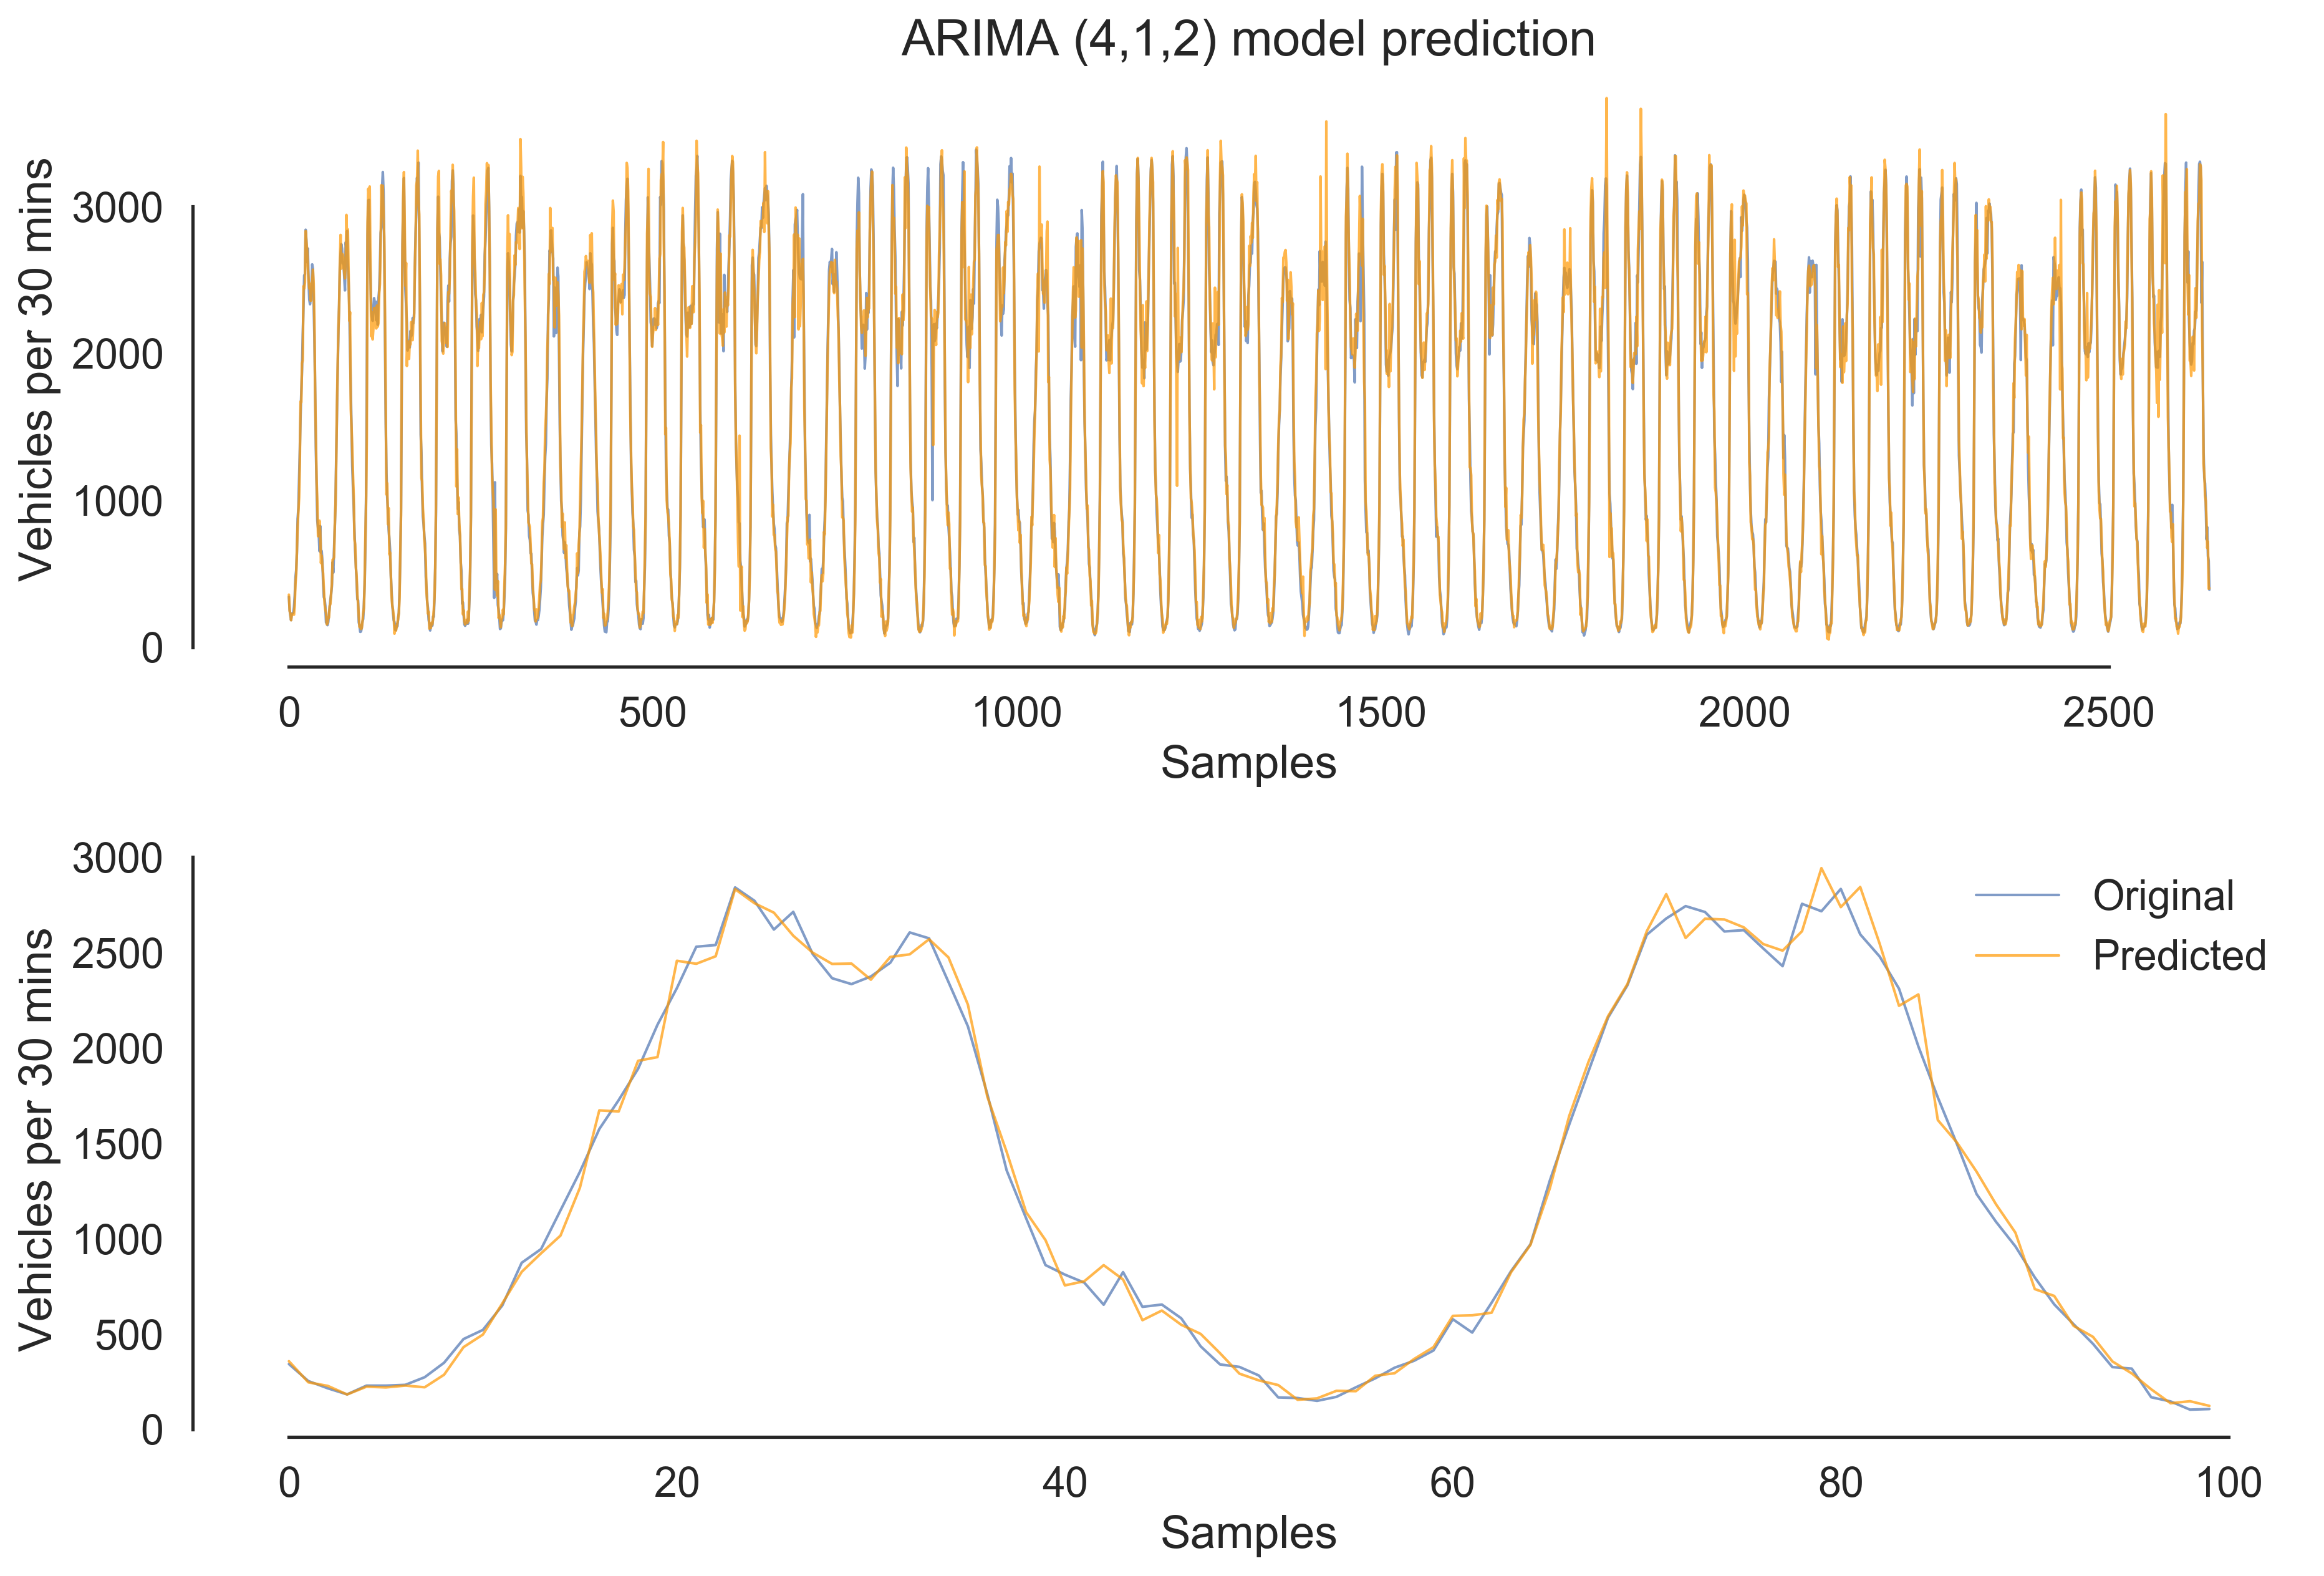

In [98]:
sns.set_style('white')
plt.figure(dpi=300)
plt.subplot(211)

plt.plot(y_test, linewidth=1, alpha=0.7, label='Original')
plt.plot(y_pred, linewidth=1, alpha=0.7, label='Predicted', color=c_orange)

plt.title('ARIMA (4,1,2) model prediction')
plt.xlabel('Samples')
plt.ylabel('Vehicles per 30 mins')
sns.despine(offset=0, trim=True)
plt.tight_layout()

plt.subplot(212)
plt.plot(y_test[0:100], linewidth=1, alpha=0.7, label='Original')
plt.plot(y_pred[0:100], linewidth=1, alpha=0.7, label='Predicted', color=c_orange)

plt.xlabel('Samples')
plt.ylabel('Vehicles per 30 mins')
plt.legend()
sns.despine(offset=0, trim=True)
plt.tight_layout()

# plt.savefig('arima-prediction.png')

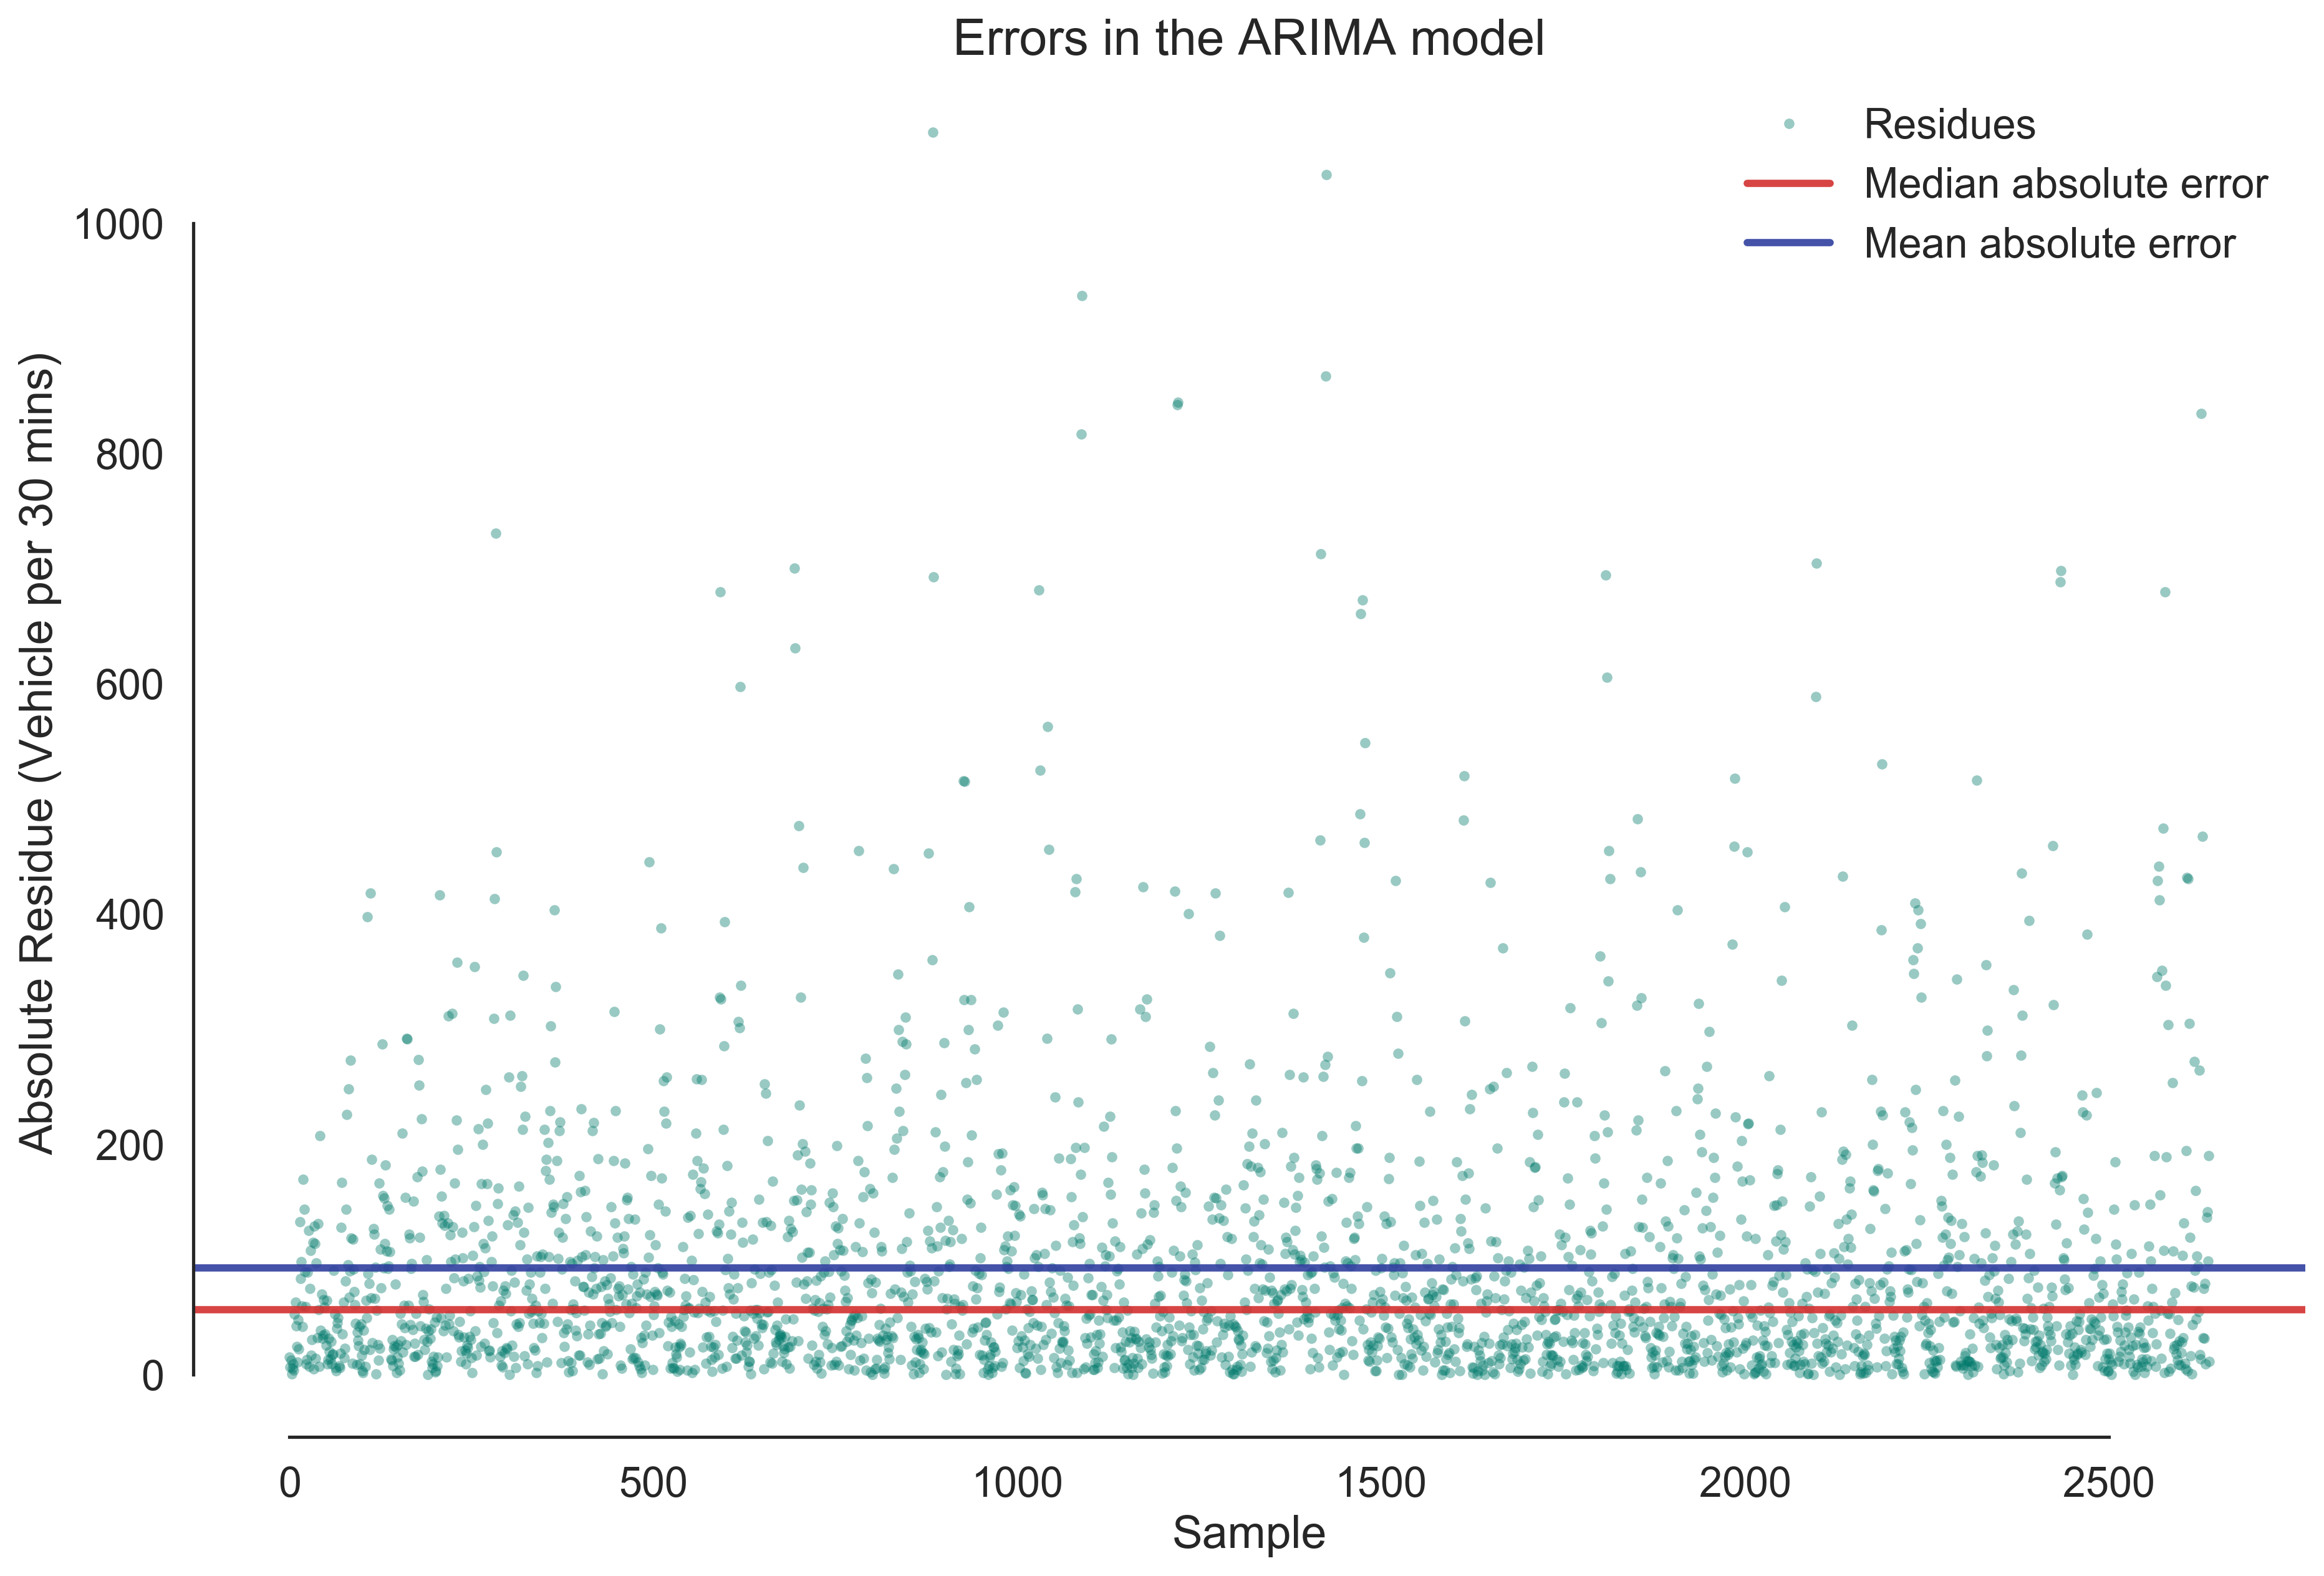

In [146]:
resid = abs(y_test - y_pred)

fig, ax = plt.subplots(dpi=300)

plt.plot(resid, '.', alpha=0.4, markersize=8, c=c_teal_d, label='Residues')
ax.axhline(y=median_ae, c=c_red, alpha=0.9, label='Median absolute error')
ax.axhline(y=mean_ae, c=c_blue_d, alpha=0.9, label='Mean absolute error')
plt.title('Errors in the ARIMA model')
plt.ylabel('Absolute Residue (Vehicle per 30 mins)')
plt.xlabel('Sample')
plt.legend()
sns.despine(offset=0, trim=True)
plt.tight_layout()
plt.savefig('ARIMA-error.png')

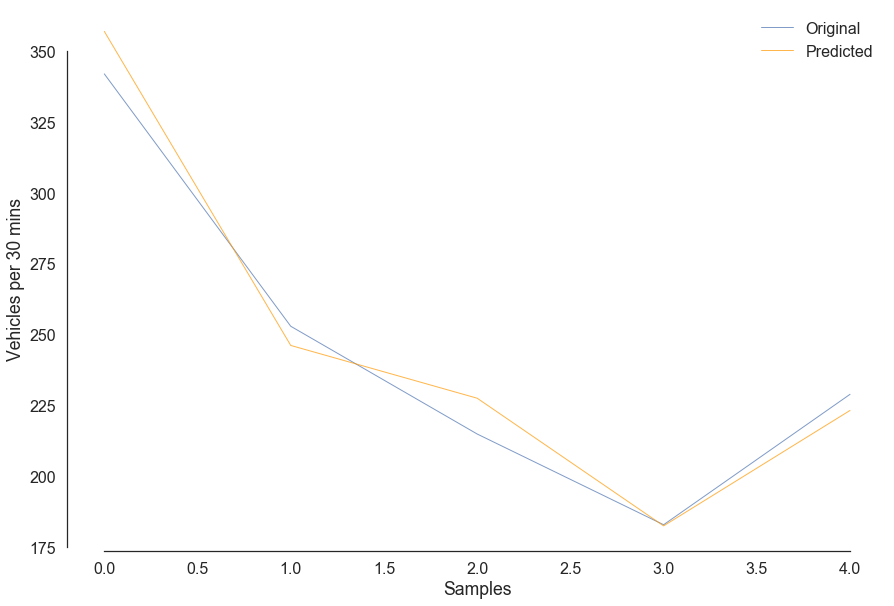

In [105]:
sns.set_style('white')
aa = y_test[0:5]
bb = y_pred[0:5]
plt.plot(aa, linewidth=1, alpha=0.7, label='Original')
plt.plot(bb, linewidth=1, alpha=0.7, label='Predicted', color=c_orange)

plt.xlabel('Samples')
plt.ylabel('Vehicles per 30 mins')
plt.legend()
sns.despine(offset=0, trim=True)
plt.tight_layout()

# plt.savefig('arima-prediction.png')

In [106]:
r2_score(aa, bb), mean_absolute_error(aa, bb)

(0.96805689250302396, 8.0920108770288444)

## Fill Missing Data

In [126]:
df = pd.read_hdf('elite_sen_3.h5', 'table')
dft = df['trf_count'].loc['2016-09-01':]
dft2 = dft.resample('1800S').sum()
dft3 = dft2.loc['2016-11-01':'2017-03-01']
del [df, dft, dft2]

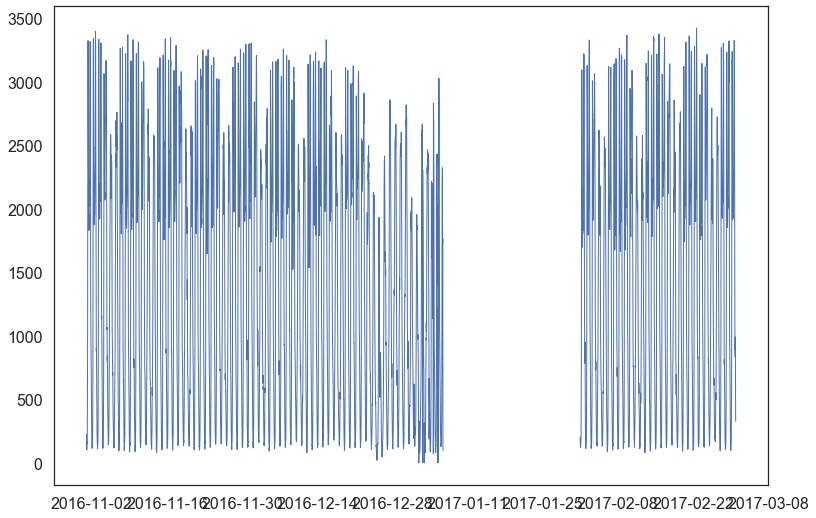

In [127]:
plt.plot(dft3, linewidth=1)

In [145]:
# number of records before missing
n_rec = len(dft3.loc[:'2017-01-10'].dropna())

In [154]:
n_rec

3190

In [160]:
dft3.iloc[3185:3192]

timestamp
2017-01-06 08:30:00    2100.0
2017-01-06 09:00:00    1725.0
2017-01-06 09:30:00    1735.0
2017-01-06 10:00:00    1763.0
2017-01-06 10:30:00      97.0
2017-01-06 11:00:00       NaN
2017-01-06 11:30:00       NaN
Freq: 1800S, Name: trf_count, dtype: float64

In [146]:
# number of missing records
n_missing = dft3.isnull().sum()

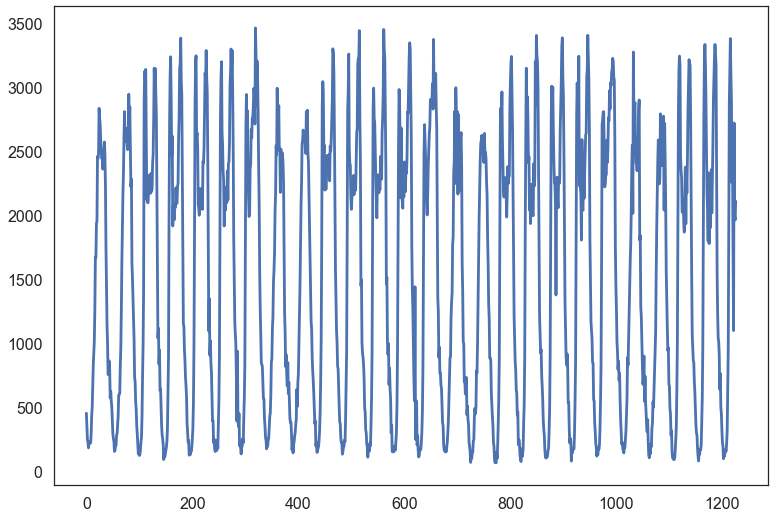

In [163]:
# prediction
pred = dff['rev_arima'].dropna().values[:n_missing]
plt.plot(pred)

In [164]:
df_fill = pd.DataFrame(dft3.values, columns=['o'])

In [165]:
# df end length
l = len(dft3) - n_rec - n_missing

z = np.zeros(n_rec)
s = np.append(z, pred)
s = np.append(s, np.zeros(l))

df_fill['pred'] = s

In [166]:
df_fill.iloc[3185:3192]

o        pred
3185  2100.0    0.000000
3186  1725.0    0.000000
3187  1735.0    0.000000
3188  1763.0    0.000000
3189    97.0    0.000000
3190     NaN  453.000000
3191     NaN  356.989937

In [169]:
df_fill.pred = df_fill.pred.replace(0.0, np.nan)

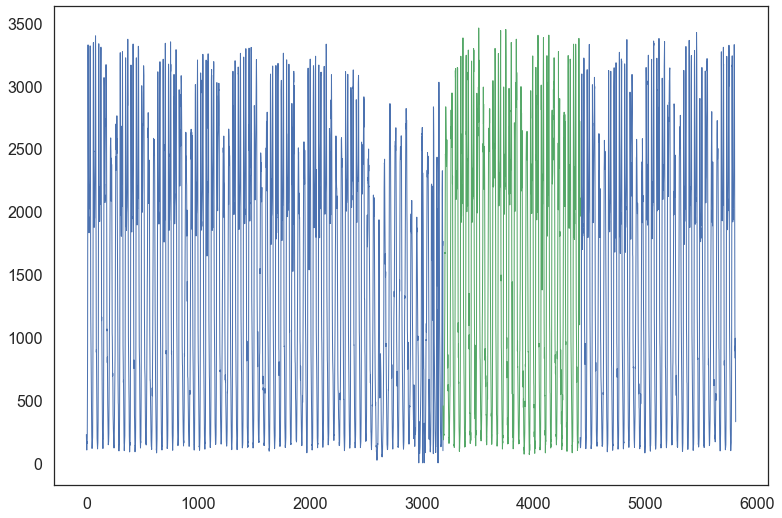

In [170]:
plt.plot(df_fill, linewidth=1)

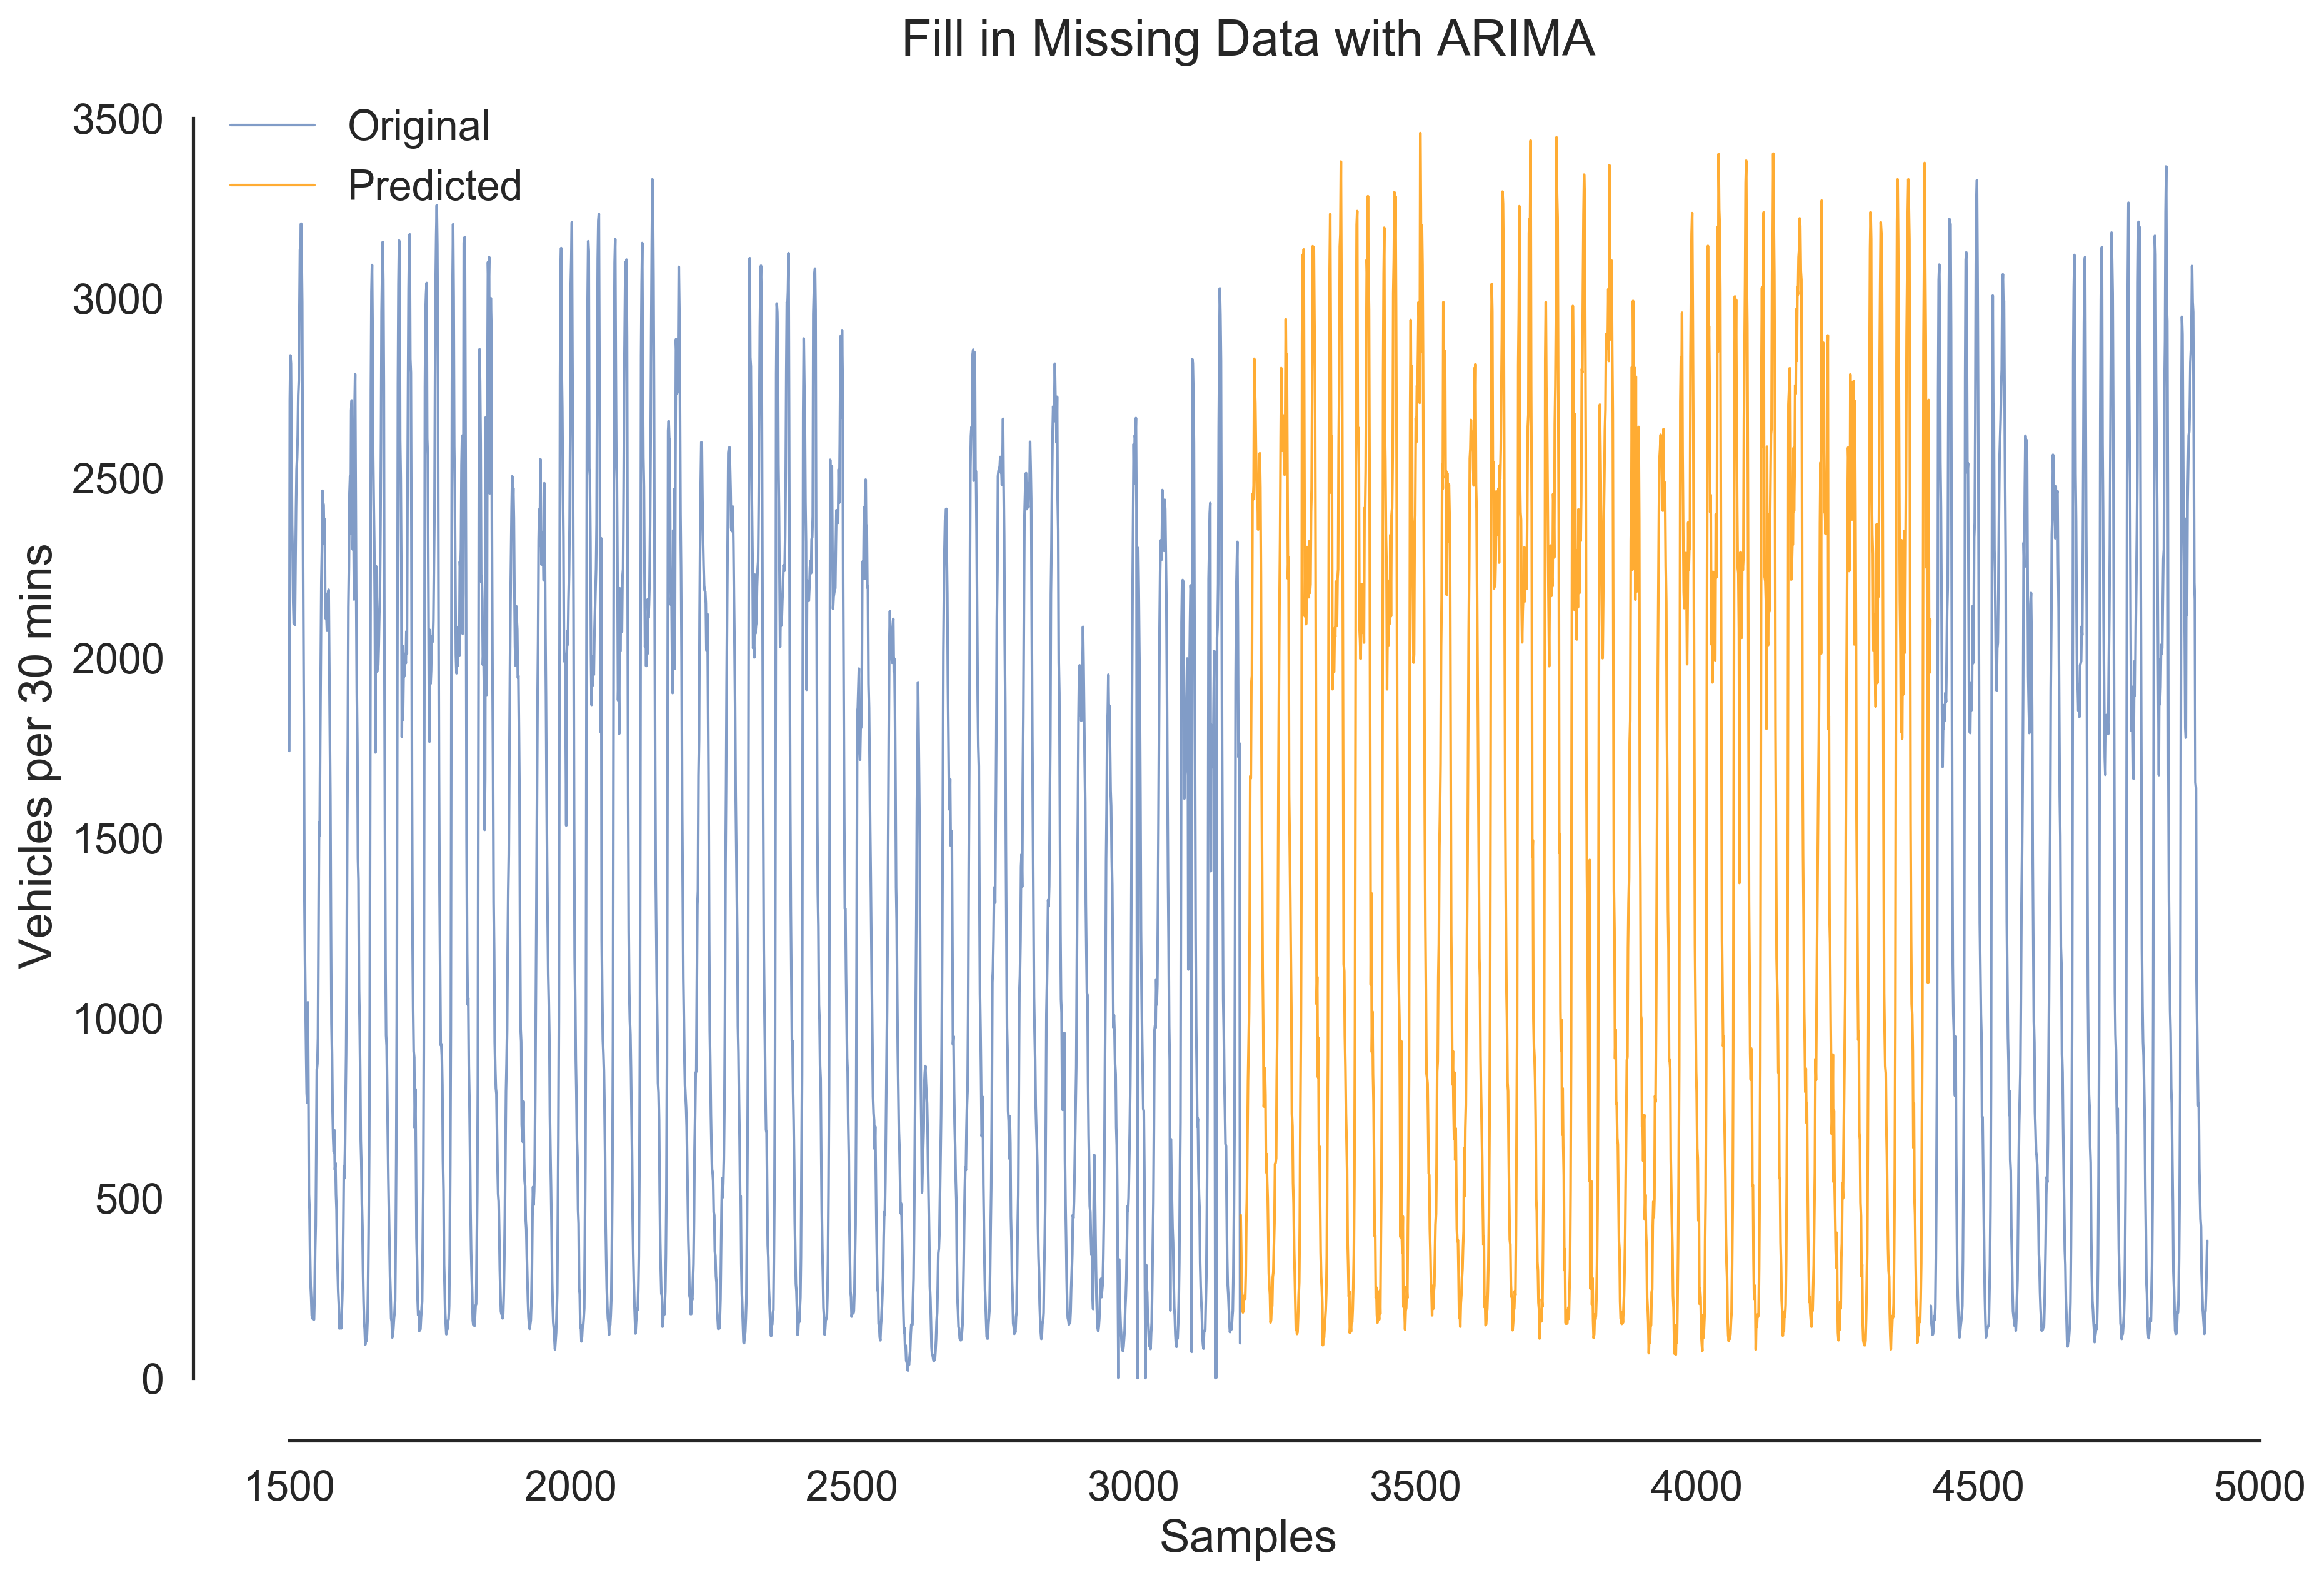

In [175]:
sns.set_style('white')
plt.figure(dpi=300)

aa = df_fill.iloc[1500:-900].o
bb = df_fill.iloc[1500:-900].pred

plt.plot(aa, linewidth=1, alpha=0.7, label='Original')
plt.plot(bb, linewidth=1, alpha=0.8, label='Predicted', color=c_orange)

plt.title('Fill in Missing Data with ARIMA')
plt.xlabel('Samples')
plt.ylabel('Vehicles per 30 mins')
plt.legend()
sns.despine(offset=0, trim=True)
plt.tight_layout()

plt.savefig('arima-prediction-res.png')